# Lab 7- Data Analysis

Exercises 1-4 are to be completed by October 25th. The remaider of the lab is due November 1st. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [2]:
# !curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

In [23]:
# !gunzip SUSY.csv.gz

In [1]:
ls -lh

total 2.5G
-rw-r--r-- 1 med3500 med3500 9.6K Aug 28 15:39  Lab.2.ipynb
-rw-r--r-- 1 med3500 med3500  66K Sep 19 19:26  Lab.3.ipynb
-rw-r--r-- 1 med3500 med3500  75K Sep 27 15:36  Lab.4.ipynb
-rw-r--r-- 1 med3500 med3500  36K Oct  4 16:01  Lab.5.ipynb
-rw-r--r-- 1 med3500 med3500 292K Oct 18 19:30  Lab.6.ipynb
-rw-r--r-- 1 med3500 med3500 3.1K Oct 30 19:44  Lab.7.ipynb
-rw-r--r-- 1 med3500 med3500 668K Oct 31 19:34  Lab.7.solution.ipynb
-rw-r--r-- 1 med3500 med3500 4.4M Oct 31 19:29  Lab7.ipynb
-rw-r--r-- 1 med3500 med3500 228M Oct 31 19:28  SUSY-small.csv
-rw-r--r-- 1 med3500 med3500 2.3G Oct 31 19:25  SUSY.csv
-rw-r--r-- 1 med3500 med3500 7.8K Oct  4 15:12  Untitled.ipynb
-rw-r--r-- 1 med3500 med3500 9.9K Oct 17 19:49  Untitled1.ipynb
-rw-r--r-- 1 med3500 med3500   75 Sep 27 15:36  drawing.txt
-rw-r--r-- 1 med3500 med3500  11K Oct  4 15:08 'lab5(2).ipynb'
-rw-r--r-- 1 med3500 med3500 3.6K Oct  4 19:20  make_deck.ipynb
-rw-r--r-- 1 med3500 med3500 2.2K Sep  9 16:33  reduce_the_function

The data is provided as a comma separated file.

In [2]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [3]:
!ls -lh

total 2.5G
-rw-r--r-- 1 med3500 med3500 9.6K Aug 28 15:39  Lab.2.ipynb
-rw-r--r-- 1 med3500 med3500  66K Sep 19 19:26  Lab.3.ipynb
-rw-r--r-- 1 med3500 med3500  75K Sep 27 15:36  Lab.4.ipynb
-rw-r--r-- 1 med3500 med3500  36K Oct  4 16:01  Lab.5.ipynb
-rw-r--r-- 1 med3500 med3500 292K Oct 18 19:30  Lab.6.ipynb
-rw-r--r-- 1 med3500 med3500 3.1K Oct 30 19:44  Lab.7.ipynb
-rw-r--r-- 1 med3500 med3500 5.4M Oct 31 21:30  Lab.7.solution-Copy1.ipynb
-rw-r--r-- 1 med3500 med3500 5.4M Oct 31 21:30  Lab.7.solution.ipynb
-rw-r--r-- 1 med3500 med3500 4.4M Oct 31 19:43  Lab7.ipynb
-rw-r--r-- 1 med3500 med3500 228M Oct 31 19:28  SUSY-small.csv
-rw-r--r-- 1 med3500 med3500 2.3G Oct 31 19:25  SUSY.csv
-rw-r--r-- 1 med3500 med3500 7.8K Oct  4 15:12  Untitled.ipynb
-rw-r--r-- 1 med3500 med3500 9.9K Oct 17 19:49  Untitled1.ipynb
-rw-r--r-- 1 med3500 med3500   75 Sep 27 15:36  drawing.txt
-rw-r--r-- 1 med3500 med3500  11K Oct  4 15:08 'lab5(2).ipynb'
-rw-r--r-- 1 med3500 med3500 3.6K Oct  4 19:20  make_dec

We see that we have 5 million datapoints.

In [4]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [28]:
# !head -500000 SUSY.csv > SUSY-small.csv

In [5]:
ls -lh

total 2.5G
-rw-r--r-- 1 med3500 med3500 9.6K Aug 28 15:39  Lab.2.ipynb
-rw-r--r-- 1 med3500 med3500  66K Sep 19 19:26  Lab.3.ipynb
-rw-r--r-- 1 med3500 med3500  75K Sep 27 15:36  Lab.4.ipynb
-rw-r--r-- 1 med3500 med3500  36K Oct  4 16:01  Lab.5.ipynb
-rw-r--r-- 1 med3500 med3500 292K Oct 18 19:30  Lab.6.ipynb
-rw-r--r-- 1 med3500 med3500 3.1K Oct 30 19:44  Lab.7.ipynb
-rw-r--r-- 1 med3500 med3500 5.4M Oct 31 21:30  Lab.7.solution-Copy1.ipynb
-rw-r--r-- 1 med3500 med3500 5.4M Oct 31 21:30  Lab.7.solution.ipynb
-rw-r--r-- 1 med3500 med3500 4.4M Oct 31 19:43  Lab7.ipynb
-rw-r--r-- 1 med3500 med3500 228M Oct 31 19:28  SUSY-small.csv
-rw-r--r-- 1 med3500 med3500 2.3G Oct 31 19:25  SUSY.csv
-rw-r--r-- 1 med3500 med3500 7.8K Oct  4 15:12  Untitled.ipynb
-rw-r--r-- 1 med3500 med3500 9.9K Oct 17 19:49  Untitled1.ipynb
-rw-r--r-- 1 med3500 med3500   75 Sep 27 15:36  drawing.txt
-rw-r--r-- 1 med3500 med3500  11K Oct  4 15:08 'lab5(2).ipynb'
-rw-r--r-- 1 med3500 med3500 3.6K Oct  4 19:20  make_dec

In [6]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [7]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [8]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [9]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [10]:
FeatureNames

['axial_MET',
 'M_TR_2',
 'MT2',
 'dPhi_r_b',
 'M_R',
 'M_Delta_R',
 'MET_rel',
 'S_R',
 'R',
 'cos_theta_r1']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [ ]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)
# df = df.head(1000)

You can see the data in Jupyter by just evaluateing the dataframe:

In [13]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0       0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1       1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2       1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3       1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4       1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
..      ...       ...       ...       ...       ...       ...       ...   
995     0.0  0.657944 -1.460057 -0.986313  0.903999 -1.782192 -0.082274   
996     1.0  1.213846  0.576764 -0.284917  0.717192 -1.027482  0.380569   
997     0.0  0.463083 -1.072674  0.587277  0.745399 -1.446827 -1.017273   
998     1.0  1.726216  0.023452 -0.470199  0.998458 -0.271326  1.389618   
999     1.0  0.695360 -1.959122  0.595577  1.161213 -1.889090 -0.565894   

          MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2         R  \
0    0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637  0.410772   
1    3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051  0.481928   
2    1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514  1.587535   
3    2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211  1.582217   
4    1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218  0.728563   
..        ...       ...       ...        ...       ...       ...       ...   
995  0.996796  1.446913  1.337072  -0.541039  0.639376  1.094519  1.519090   
996  0.933988  1.551331  1.402031  -0.616373  1.205215  1.343923  0.989521   
997  0.068956 -0.856007  0.028583   0.330862  0.487719  0.196381  0.357311   
998  0.690013  1.473284  0.145078  -0.297775  1.228239  1.208553  0.873171   
999  0.742886 -1.659822  1.115164  -0.427150  0.724770  0.986586  1.207955   

          MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0    1.145621  1.932632   0.994464  1.367815      0.040714  
1    0.000000  0.448410   0.205356  1.321893      0.377584  
2    2.024308  0.603498   1.562374  1.135454      0.180910  
3    1.551914  0.761215   1.715464  1.492257      0.090719  
4    0.000000  1.083158   0.043429  1.154854      0.094859  
..        ...       ...        ...       ...           ...  
995  2.161473  0.680045   1.615787  1.062792      0.066697  
996  2.335812  1.148790   1.956674  0.170759      0.266401  
997  0.000000  0.487217   0.069561  0.623919      0.047811  
998  0.000000  1.179522   0.257432  0.427164      0.410980  
999  1.770059  0.746242   1.320521  1.370582      0.030789  

[1000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [14]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


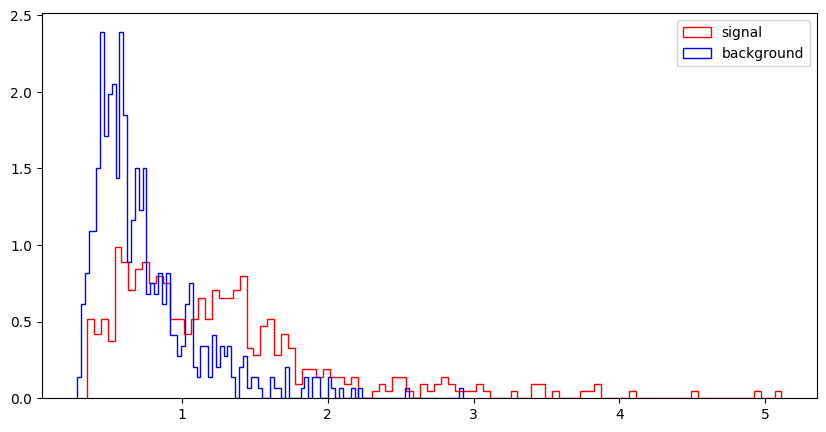

l_1_eta


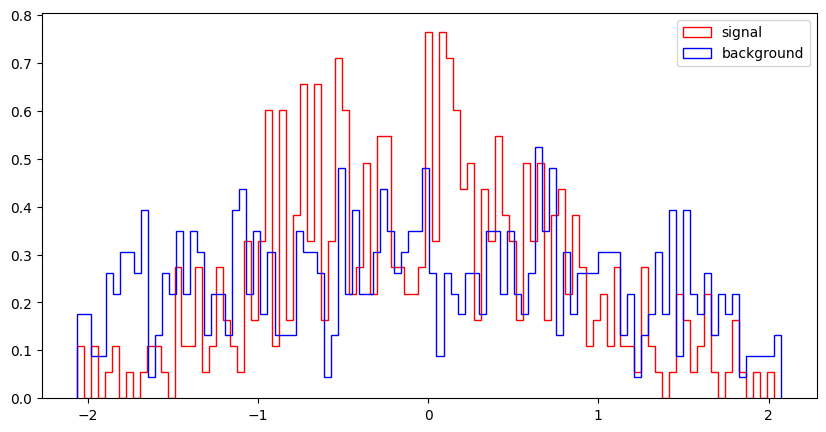

l_1_phi


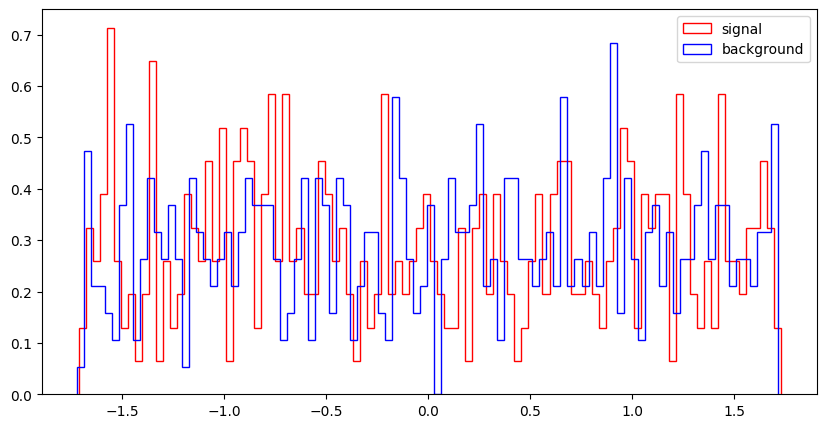

l_2_pT


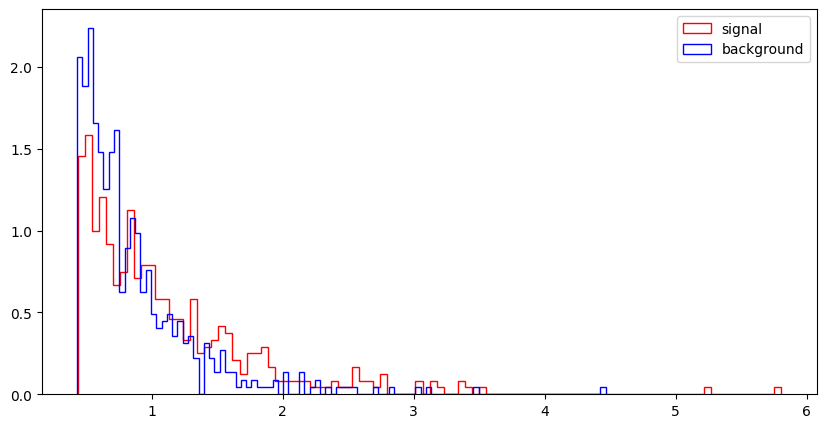

l_2_eta


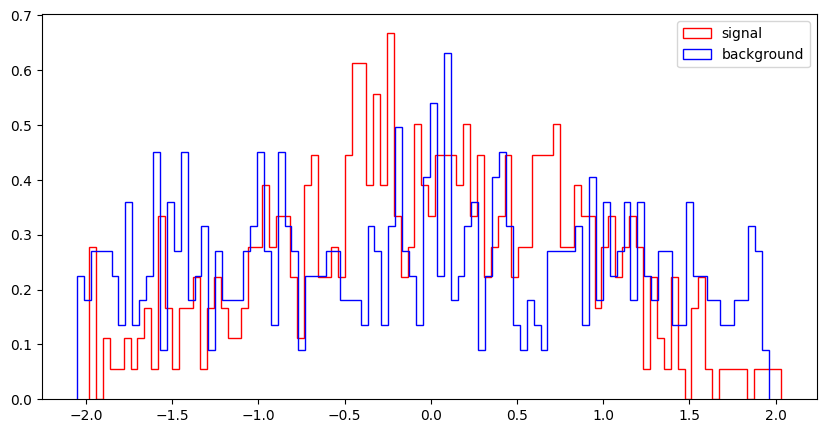

l_2_phi


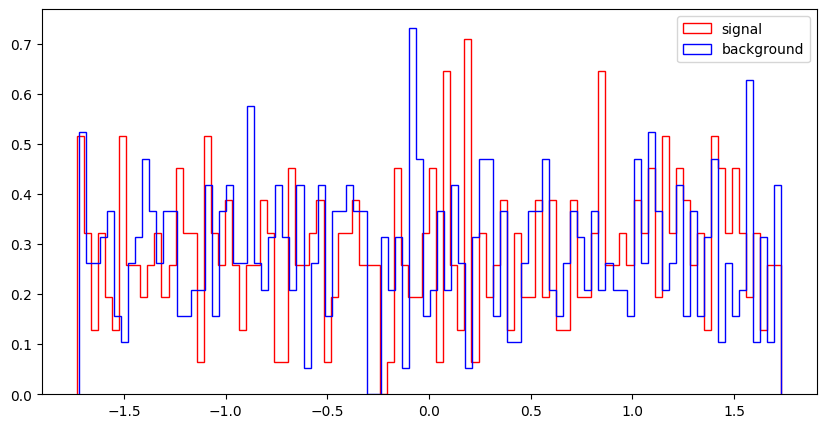

MET


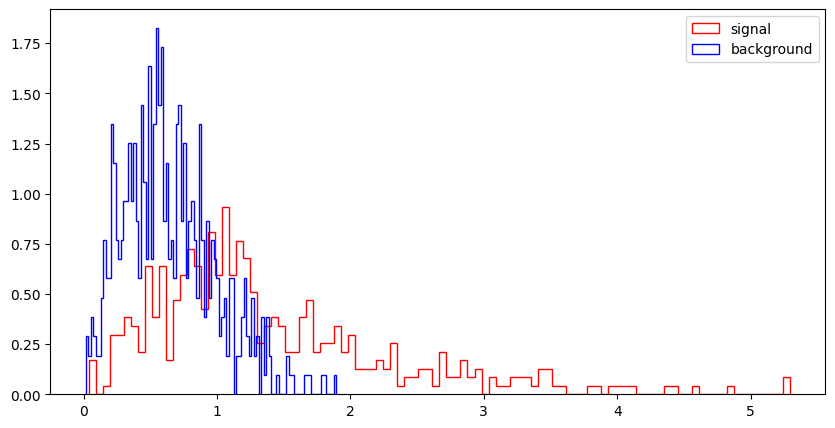

MET_phi


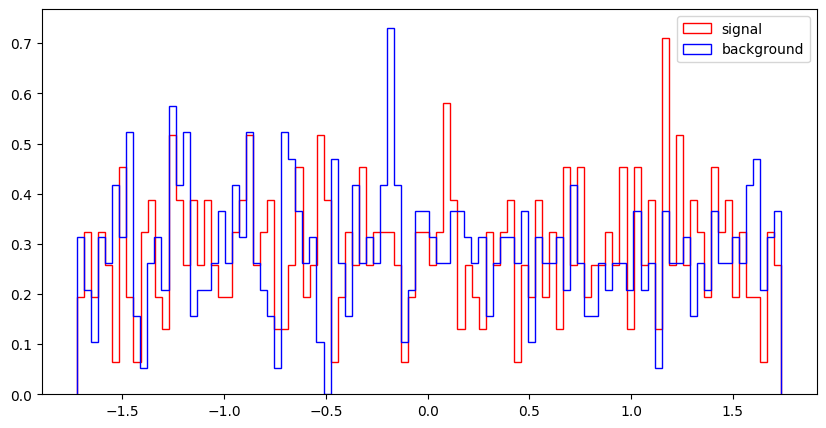

MET_rel


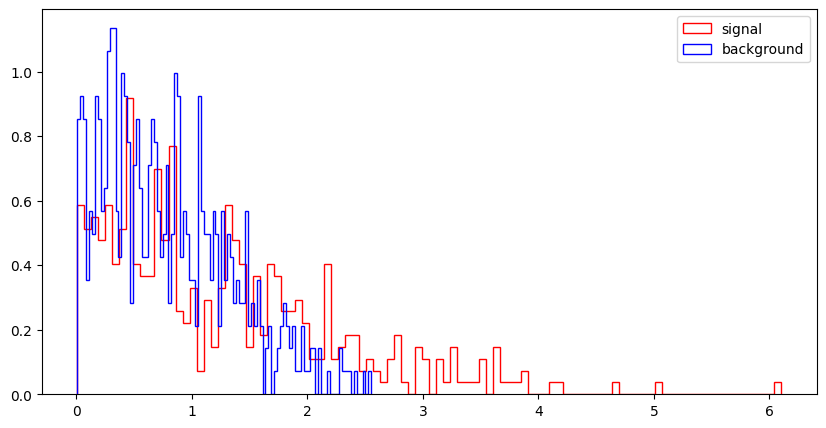

axial_MET


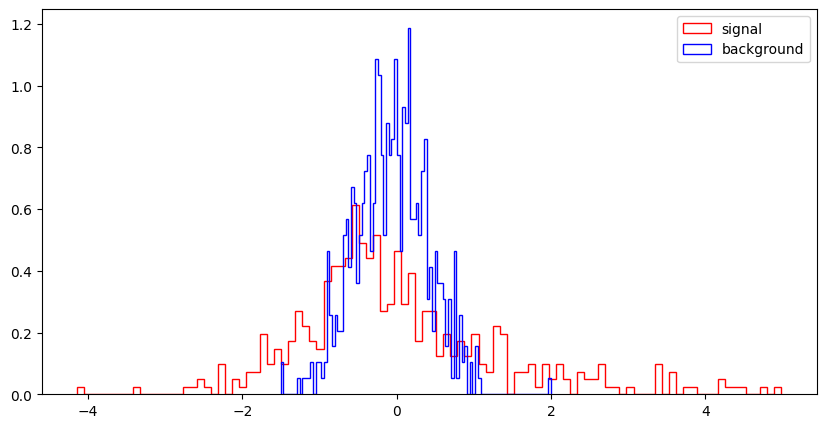

M_R


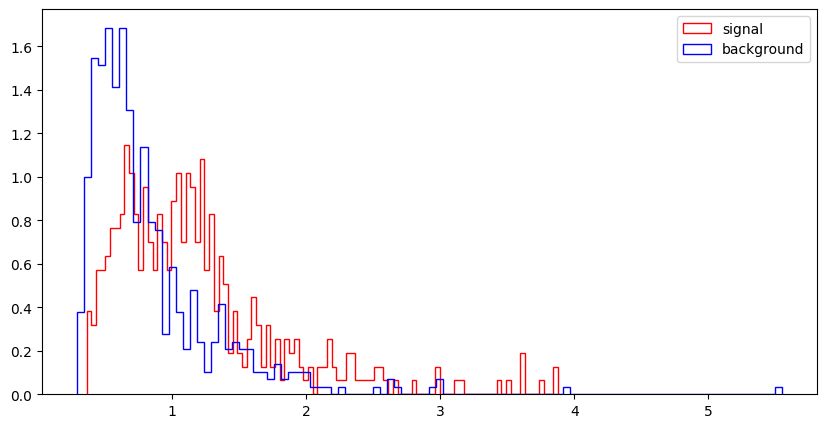

M_TR_2


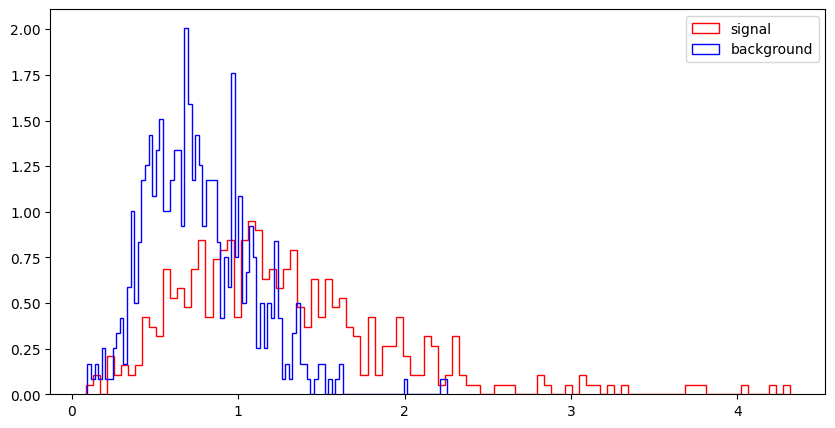

R


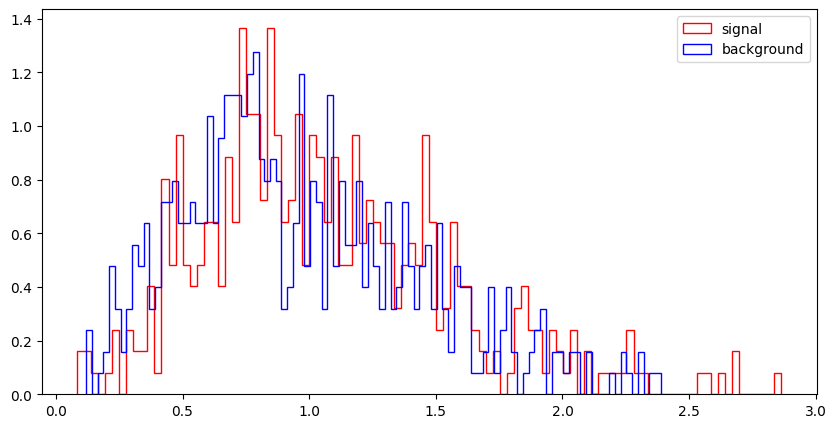

MT2


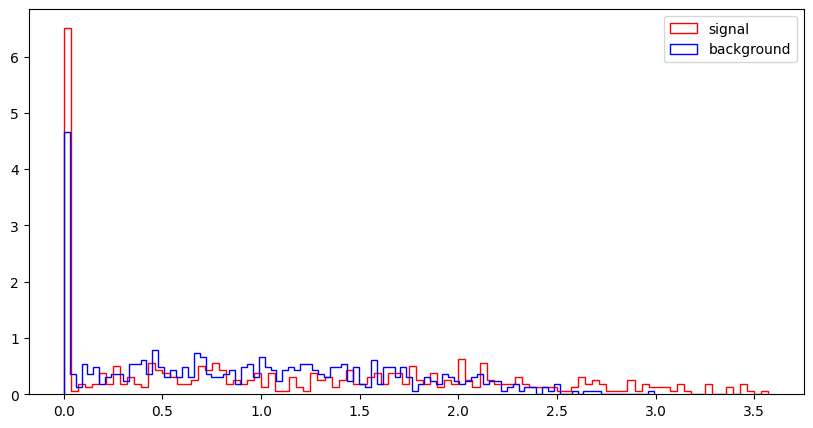

S_R


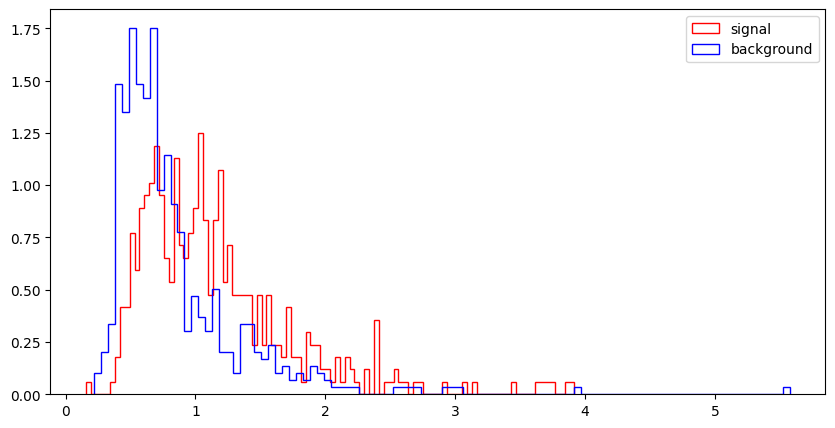

M_Delta_R


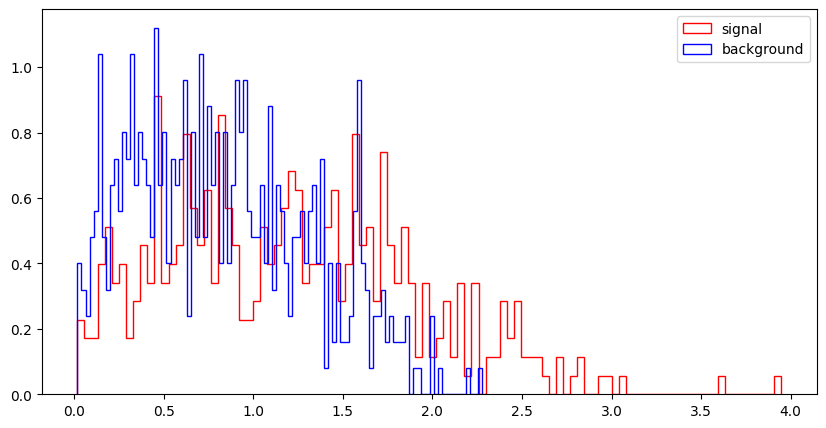

dPhi_r_b


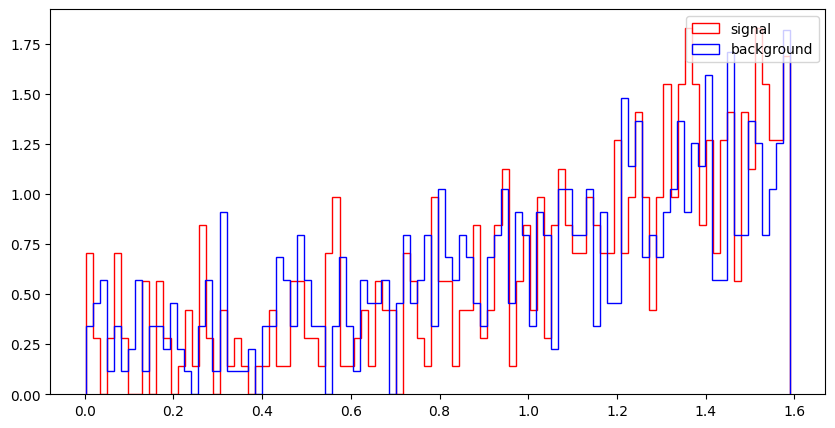

cos_theta_r1


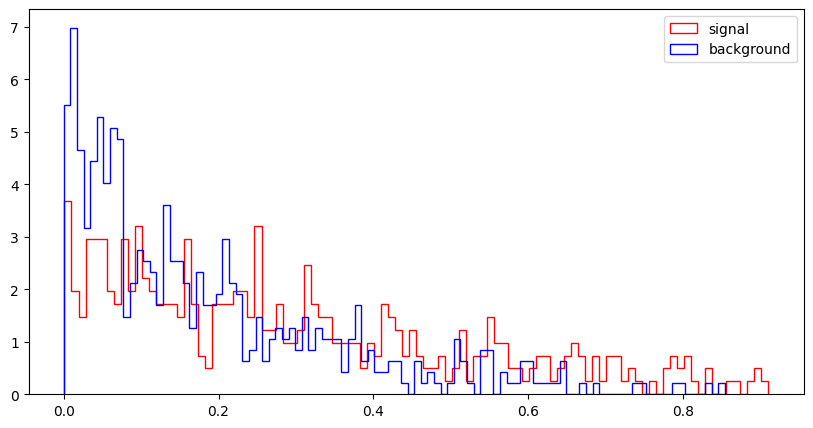

In [15]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

l_1_pT


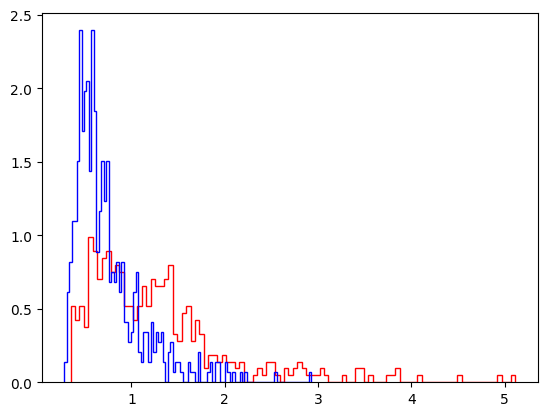

l_1_eta


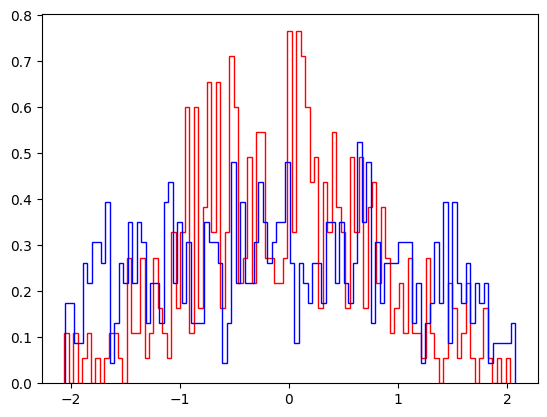

l_1_phi


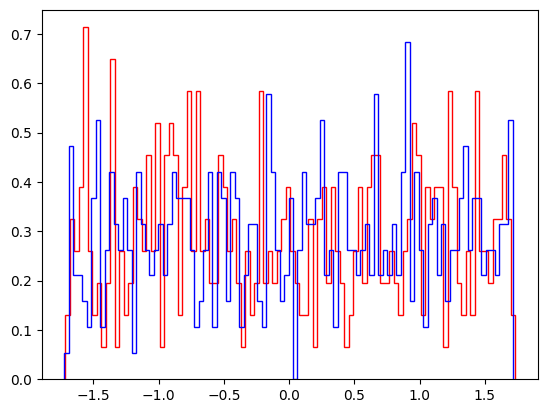

l_2_pT


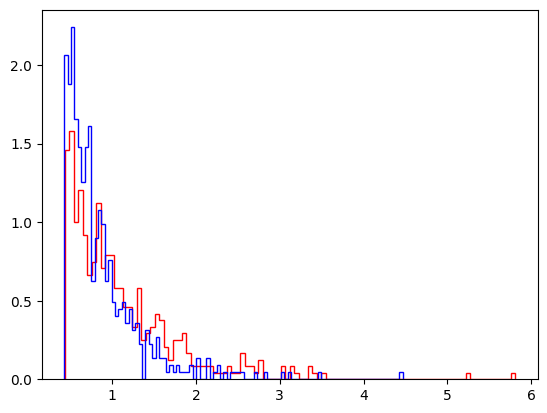

l_2_eta


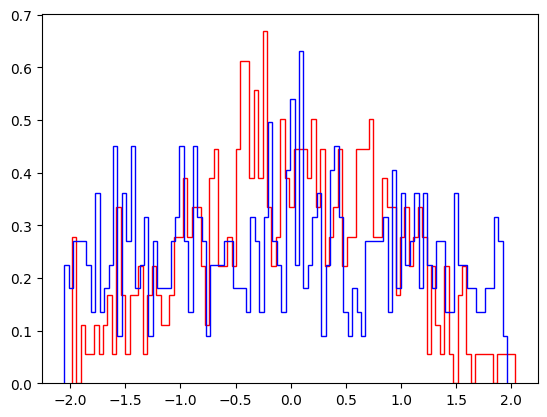

l_2_phi


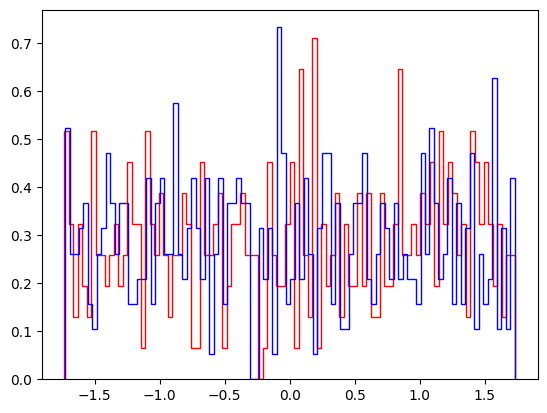

MET


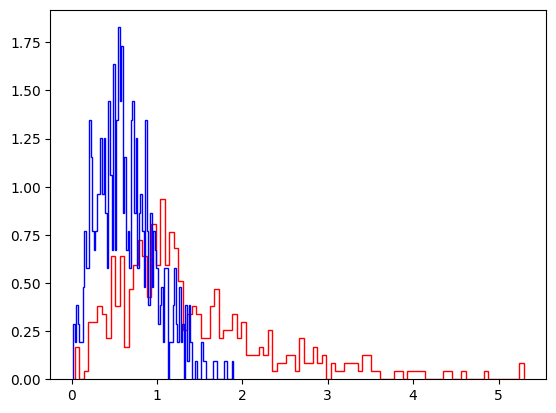

MET_phi


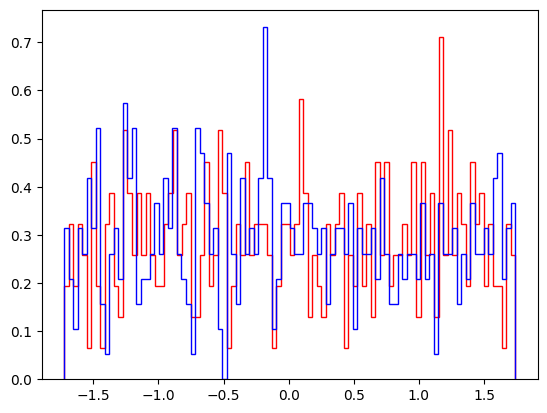

MET_rel


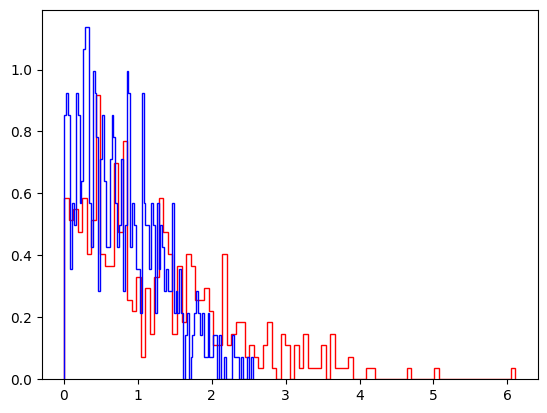

axial_MET


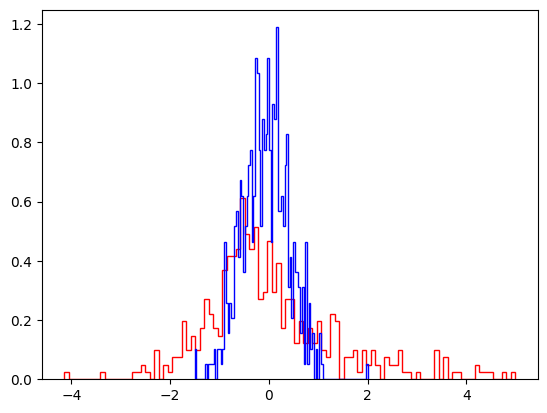

M_R


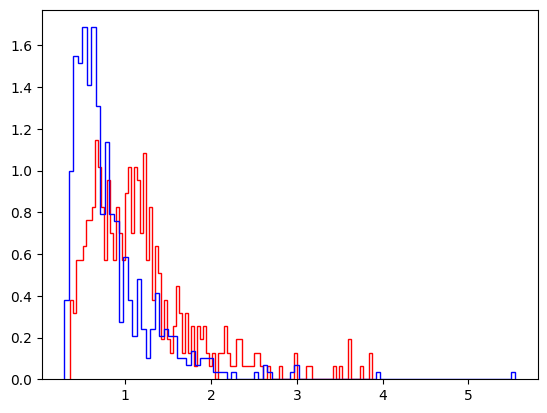

M_TR_2


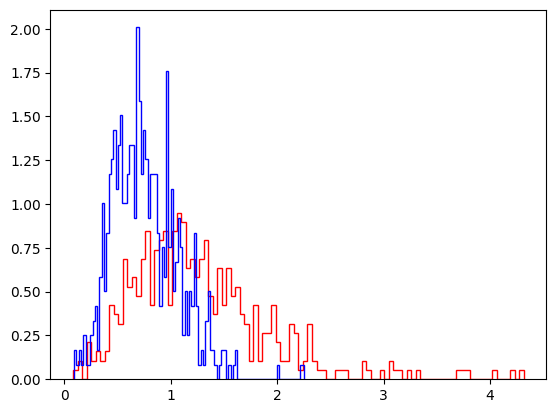

R


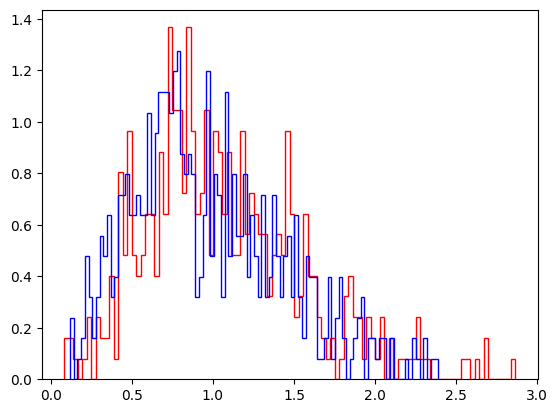

MT2


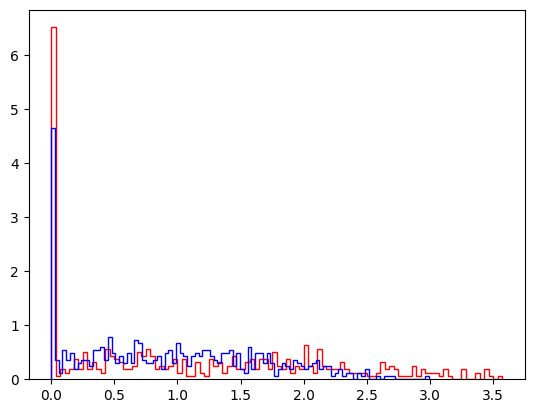

S_R


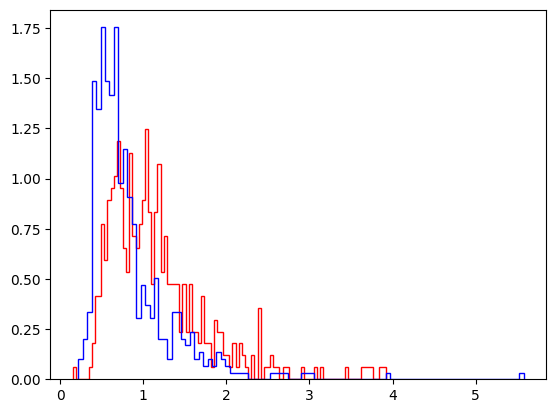

M_Delta_R


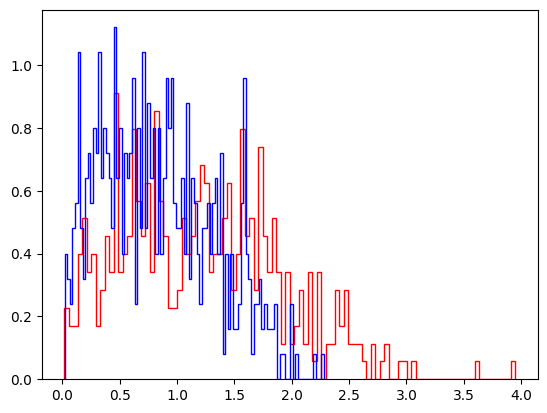

dPhi_r_b


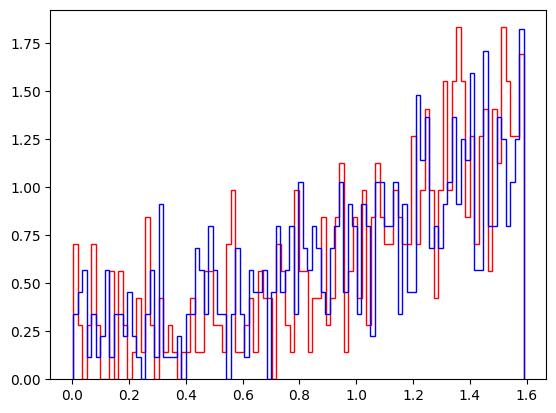

cos_theta_r1


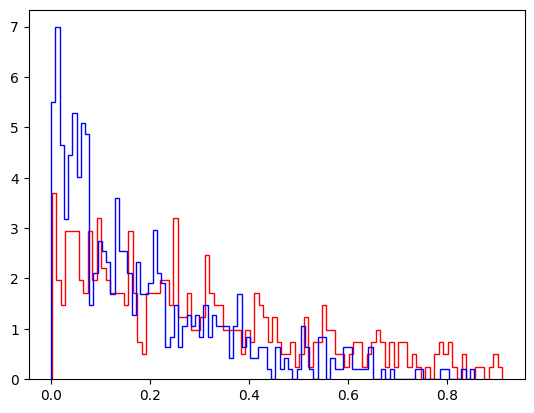

In [16]:
for var in VarNames[1:]:
    plt.hist(np.array(df_sig[var]), bins=100, histtype="step", color="red", label="signal", density=True)
    plt.hist(np.array(df_bkg[var]), bins=100, histtype="step", color="blue", label="background", density=True)

    print(var)
    plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

Pair plot for Low-Level Features:


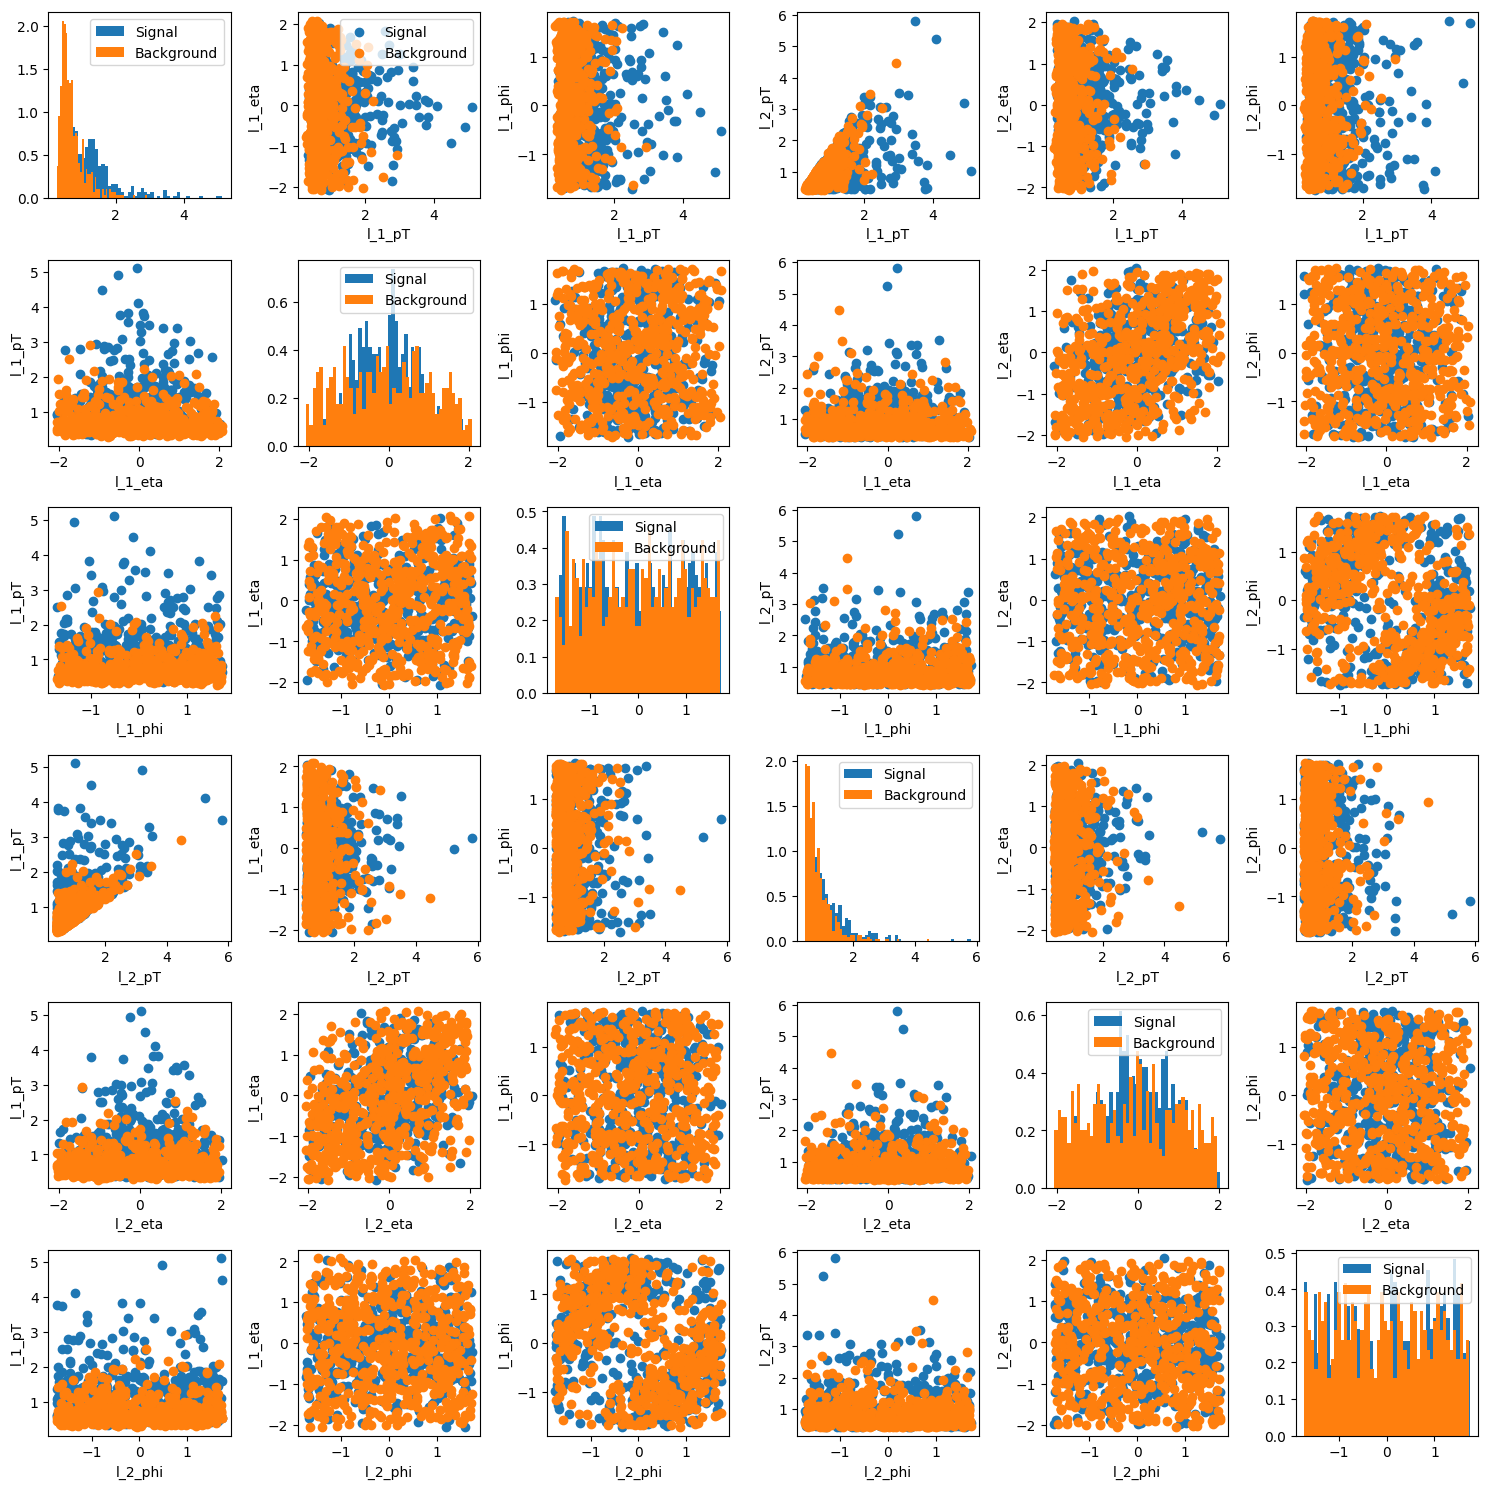



Pair plot for High-Level Features:


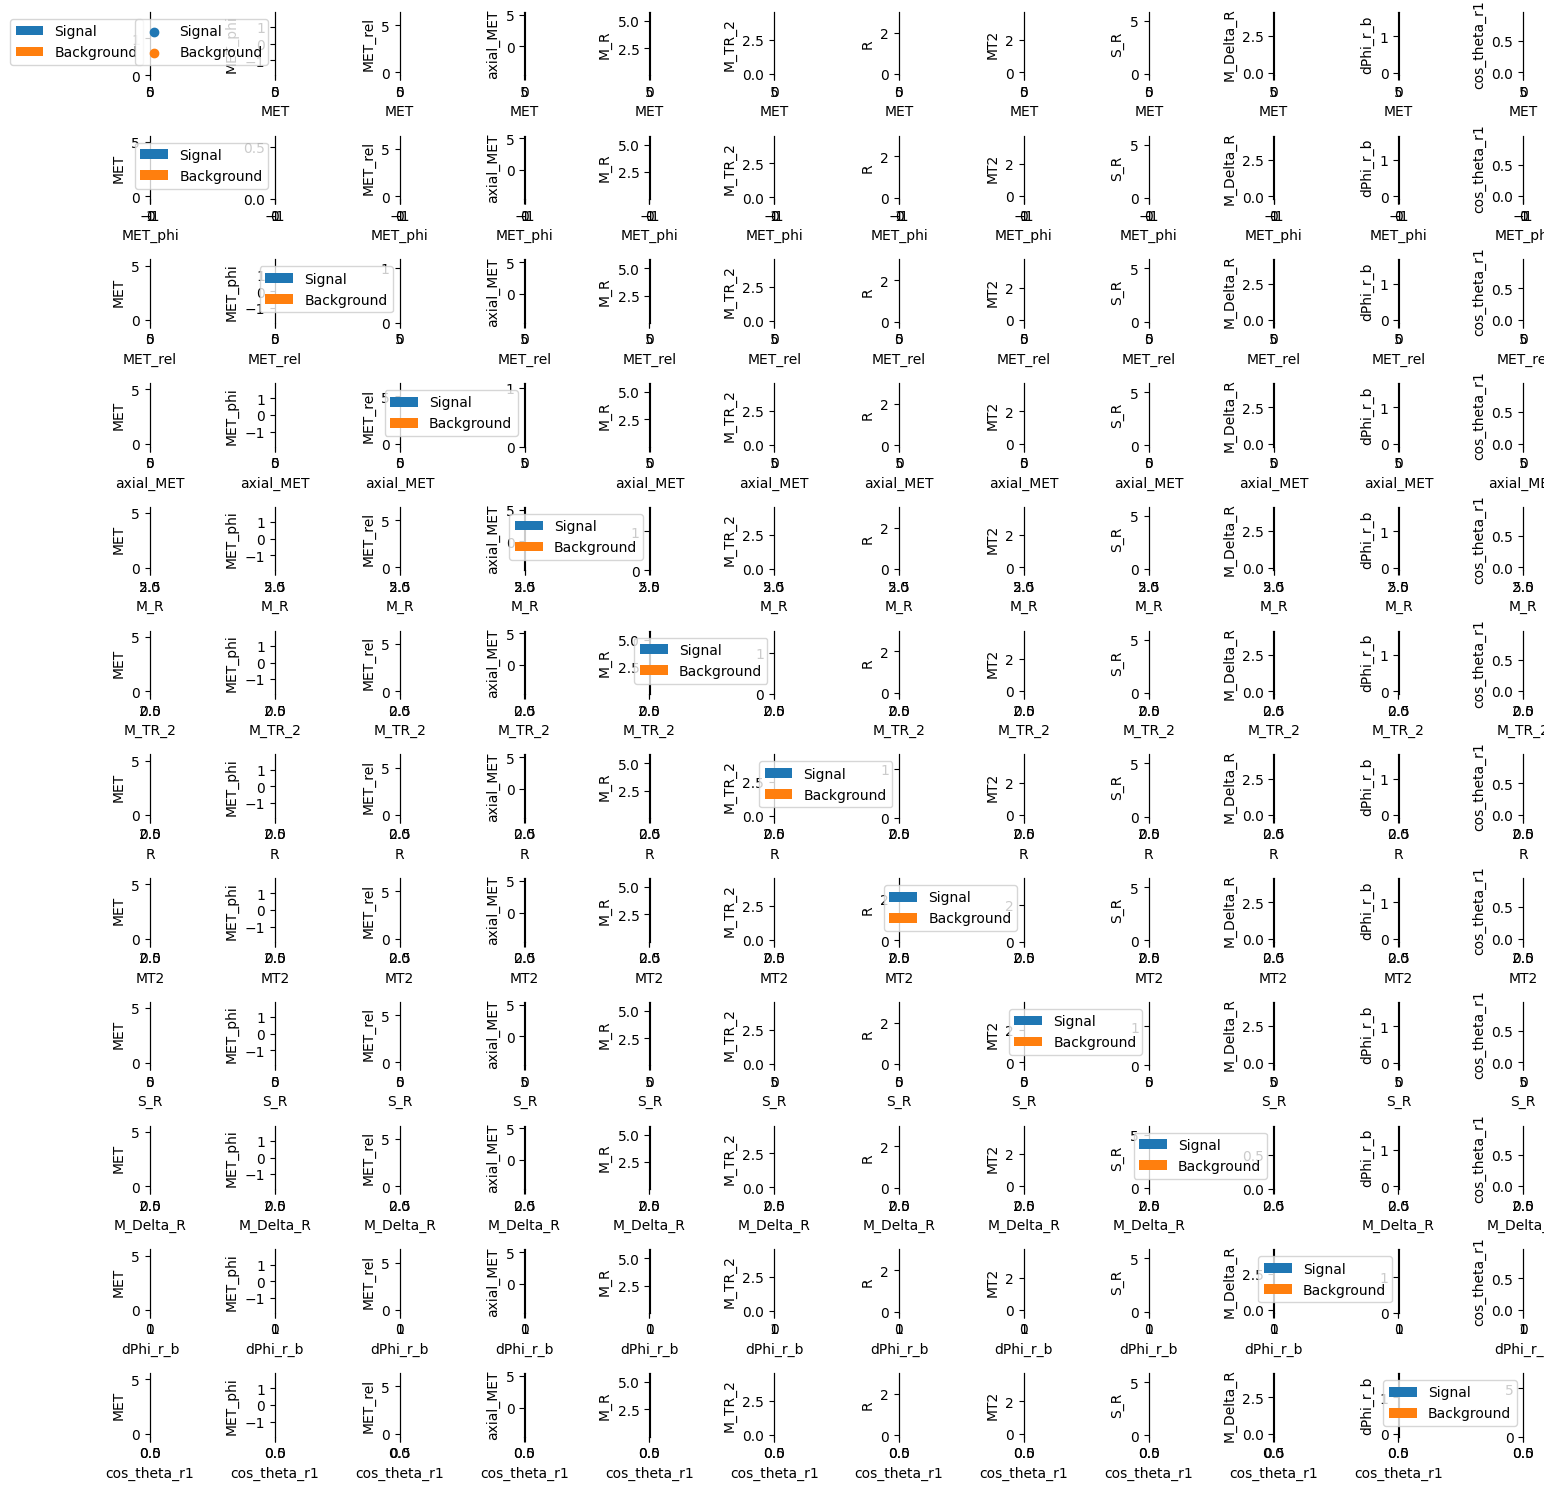

The High-Level features pair plot doesn't always fil in for me, if it doesn't work try running it again because it was on and off


In [34]:
low_level_features = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi"]
high_level_features = ["MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

def compare_distributions(df, column, selections, **kwargs):
    for label, sel in selections.items():
        plt.hist(df[sel][column], label=label, **kwargs)
    plt.legend()

def compare_scatter(df, x_var, y_var, selections, include_legend=True):
    for label, sel in selections.items():
        plt.scatter(df[sel][x_var], df[sel][y_var], label=label)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    if include_legend: plt.legend()

def pair_plot(df, columns, selections, alpha=0.5, density=True, bins=50):
    n = len(columns)
    plt.figure(figsize=(15, 15))
    for i in range(n):
        for j in range(n):
            plt.subplot(n, n, i*n + j + 1)
            if i == j:
                compare_distributions(df, columns[i], selections, alpha=alpha, density=density, bins=bins)
            else:
                compare_scatter(df, columns[i], columns[j], selections, include_legend=(i == 0 and j == 1))
    plt.tight_layout()
    plt.show()

selections = {"Signal": df["signal"] == 1, "Background": df["signal"] == 0}
print("Pair plot for Low-Level Features:")
pair_plot(df, low_level_features, selections, alpha=1, density=True, bins=50)
print("\n\nPair plot for High-Level Features:")
pair_plot(df, high_level_features, selections, alpha=1, density=True, bins=50)
print("The High-Level features pair plot doesn't always fill in for me, if it doesn't work try running it again because it was on and off")

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

Pair plot for Low-Level Features:


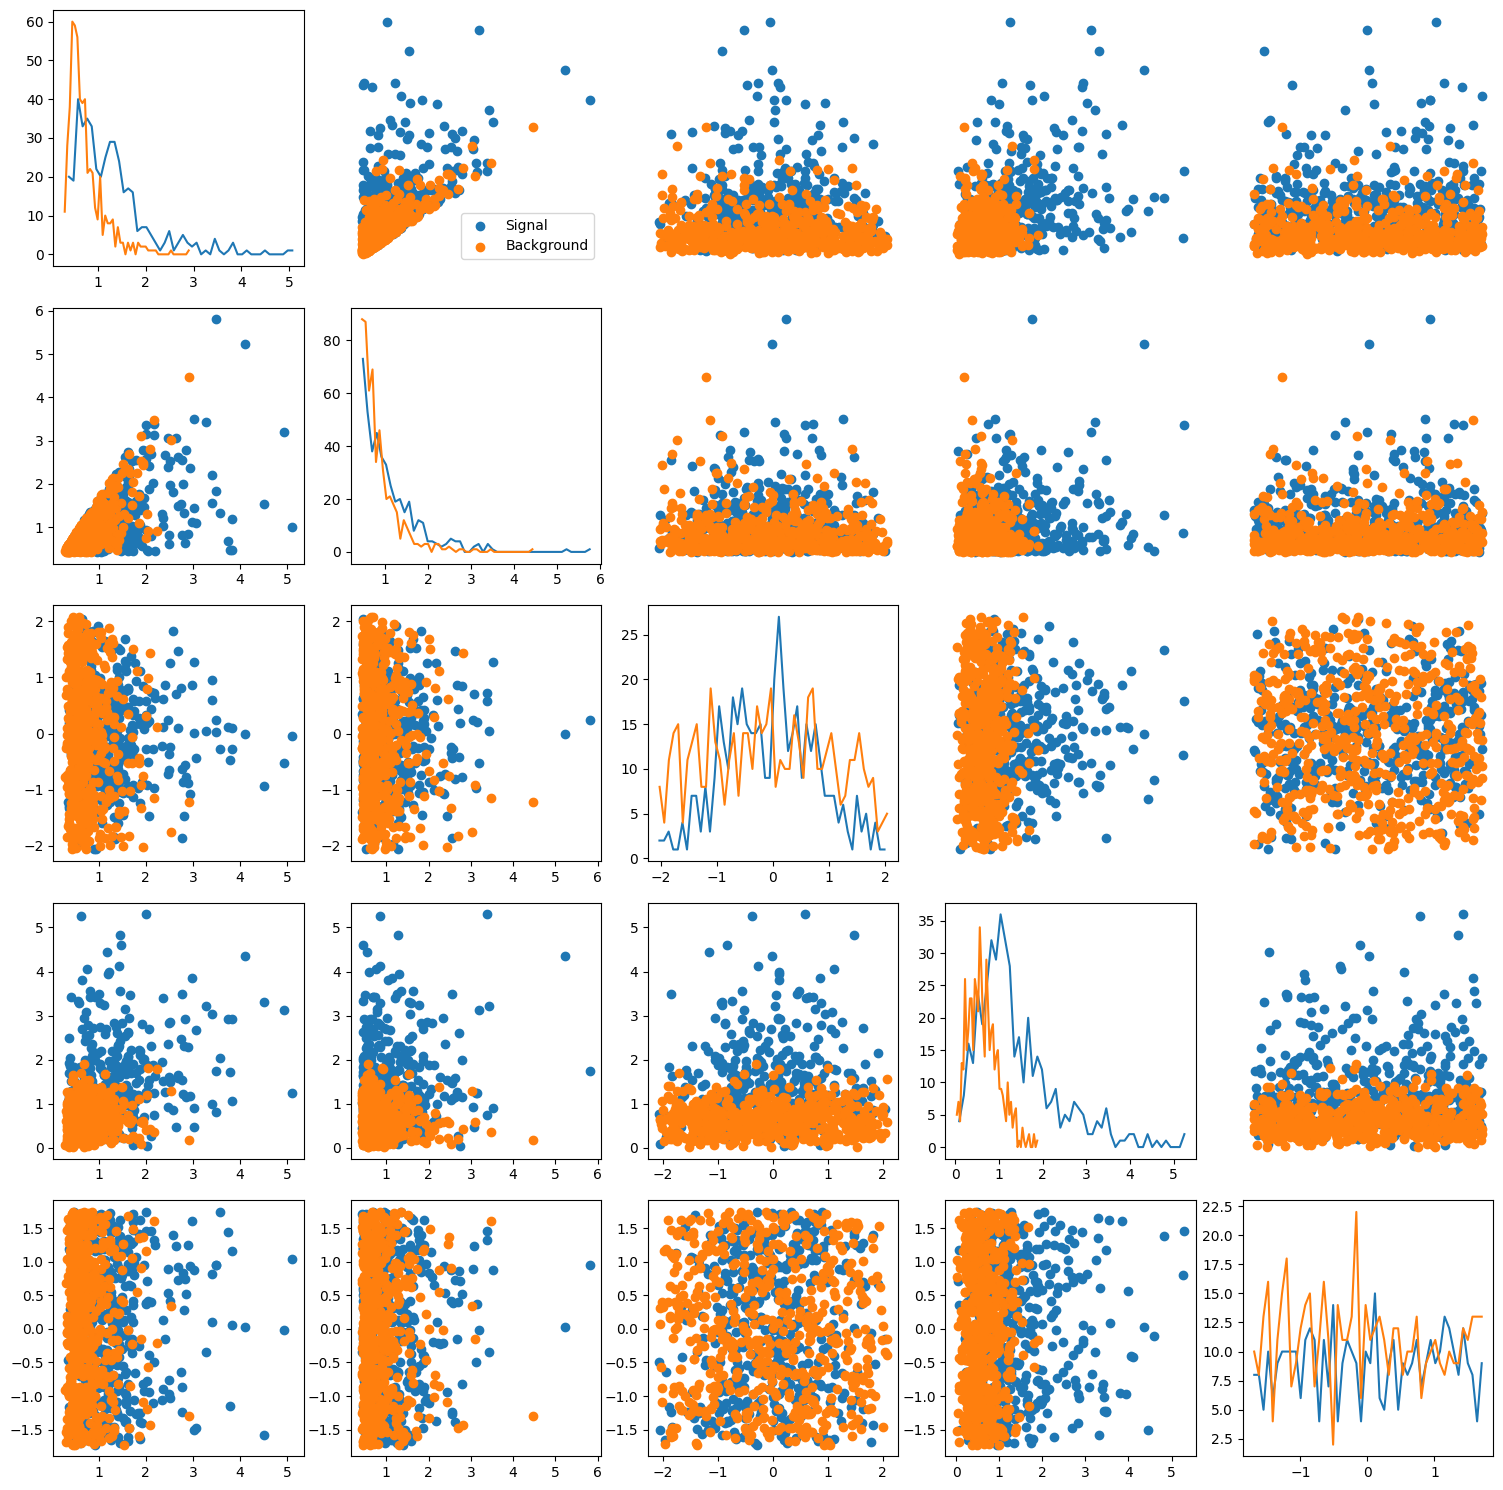

Pair plot for High-Level Features:


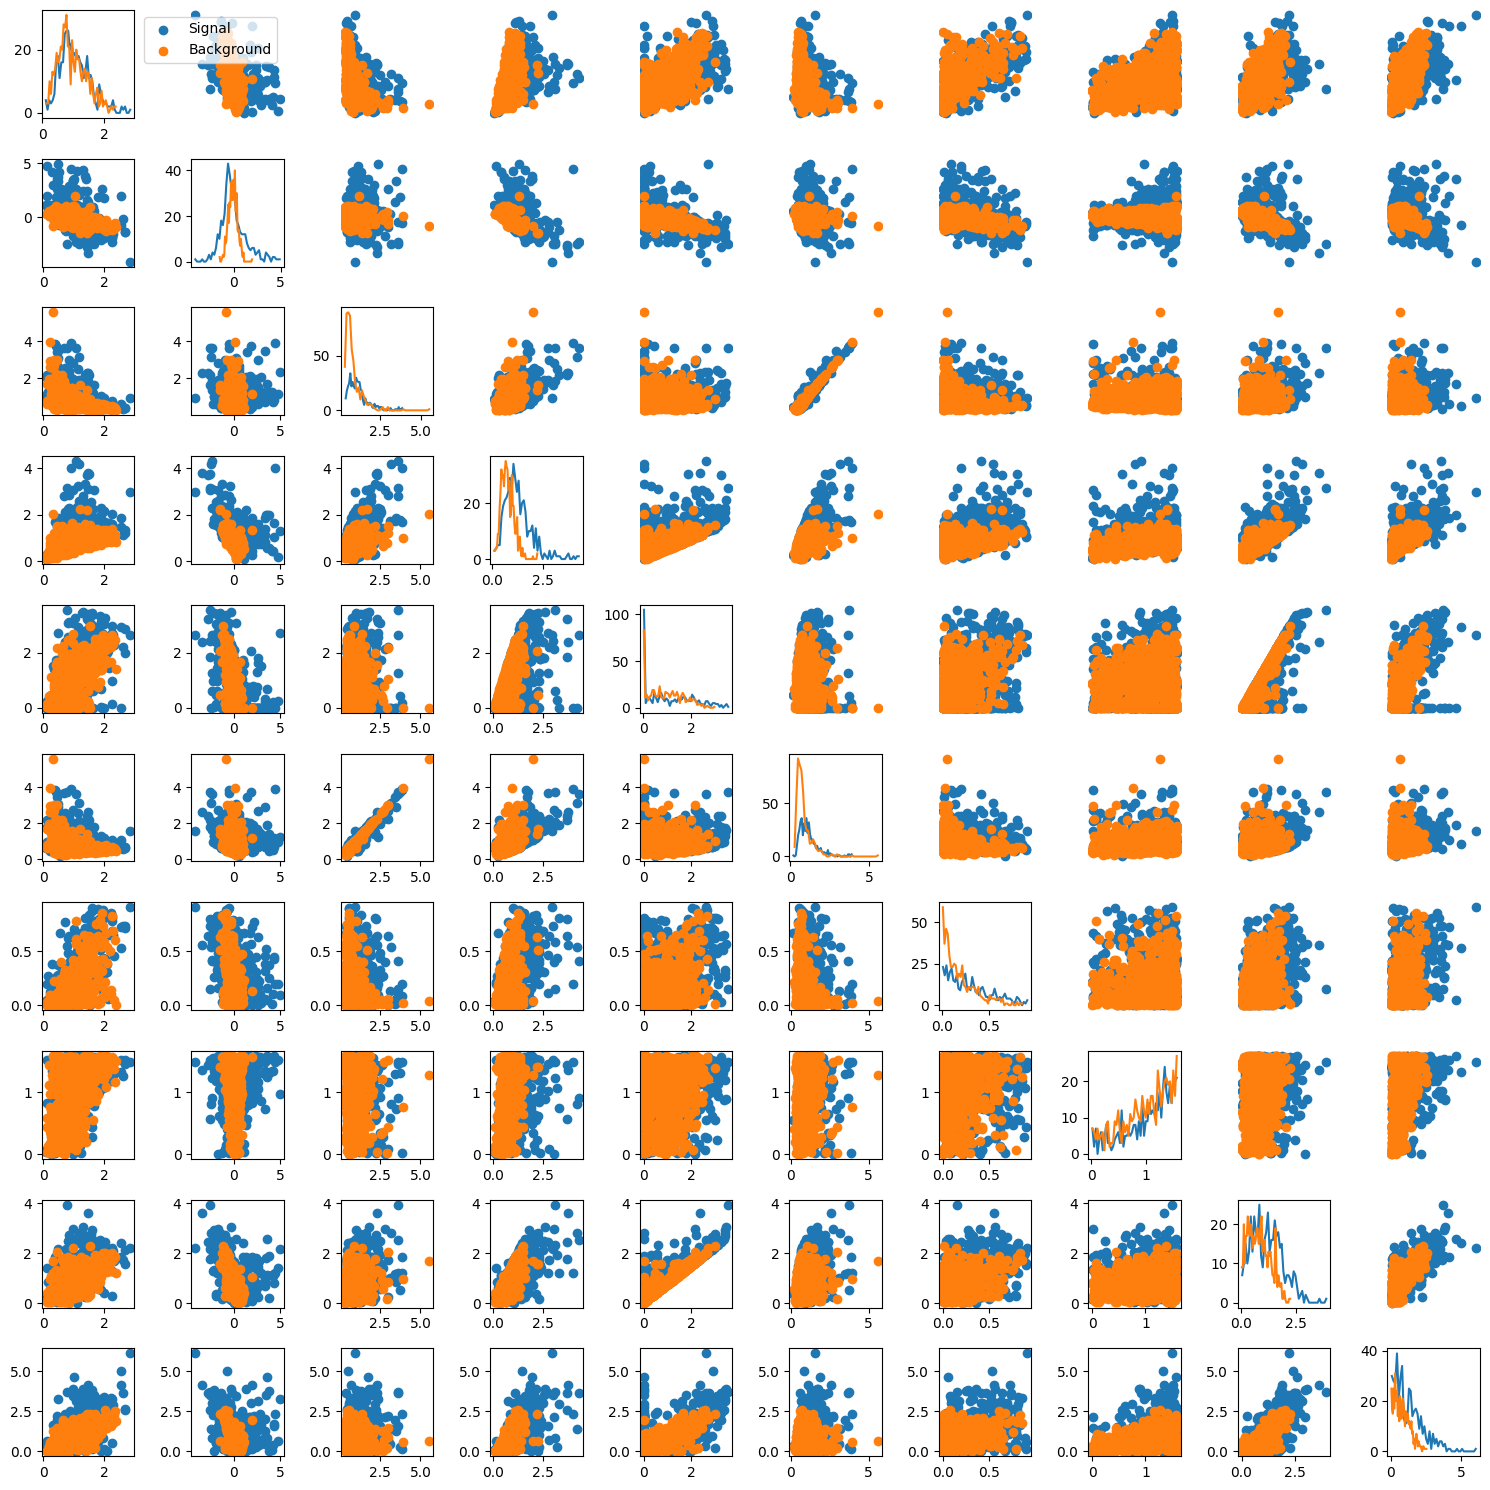

In [32]:
low_lvl_features = ["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]
high_lvl_features = ["R", "axial_MET", "M_R", "M_TR_2", "MT2", "S_R", "cos_theta_r1", "dPhi_r_b", "M_Delta_R", "MET_rel"]

def pair_plot(df, features, show_legend=False):
    n = len(features)
    fig, axs = plt.subplots(n, n, figsize=(15, 15))
    
    selections = {"Signal": df["signal"] == 1, "Background": df["signal"] == 0}
    
    for i, col1 in enumerate(features):
        for j, col2 in enumerate(features):
            for label, sel in selections.items():
                if i == j:
                    data = df[sel][col1]
                    hist, bins = np.histogram(data, bins=50)
                    bin_centers = (bins[:-1] + bins[1:]) / 2
                    axs[i, j].plot(bin_centers, hist, label=label)
                else:
                    axs[i, j].scatter(df[sel][col2], df[sel][col1], label=label, alpha=1)

            axs[i, j].xaxis.label.set_rotation(45)
            axs[i, j].yaxis.label.set_rotation(0)
            axs[i, j].yaxis.label.set_ha('right')
            
            if show_legend and (i == 0 and j == 1): axs[i, j].legend()

    for i in range(n):
        for j in range(i + 1, n):
            axs[i, j].axis("off")
    
    plt.tight_layout()
    plt.show()

def create_pair_plots(df, show_legend=False):
    print("Pair plot for Low-Level Features:")
    pair_plot(df, low_lvl_features, show_legend)
    print("Pair plot for High-Level Features:")
    pair_plot(df, high_lvl_features, show_legend)

create_pair_plots(df, show_legend=True)

#### Part c
Which observables appear to be best for separating signal from background?

In [2]:
print("Personally, I like the second version, as you can actually see both signals the majority of the time. For example, the line graph for the \nHigh Level Features is a lot easier to compare the signal vs the background because you can see them both, while with the histogram you \ncan really only see whichever is in front")

Personally, I like the second version, as you can actually see both signals the majority of the time. For example, the line graph for the 
High Level Features is a lot easier to compare the signal vs the background because you can see them both, while with the histogram you 
can really only see whichever is in front


### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

In [40]:
# pip install tabulate in the console
import tabulate

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

In [37]:
observables = [
                "signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", 
                "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", 
                "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", 
                "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
              ]

observables_data = df[observables].values
observables_covariance_matrix = np.cov(observables_data, rowvar=False)
observables_correlation_matrix = np.corrcoef(observables_data, rowvar=False)

low_lvl_features = df[["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]]
high_lvl_features = df[["R", "axial_MET", "M_R", "M_TR_2", "MT2", "S_R", "cos_theta_r1", "dPhi_r_b", "M_Delta_R", "MET_rel"]]

low_lvl_data = low_lvl_features.values
high_lvl_data = high_lvl_features.values

low_lvl_covariance_matrix = np.cov(low_lvl_data, rowvar=False)
low_lvl_correlation_matrix = np.corrcoef(low_lvl_data, rowvar=False)
high_lvl_covariance_matrix = np.cov(high_lvl_data, rowvar=False)
high_lvl_correlation_matrix = np.corrcoef(high_lvl_data, rowvar=False)

print("Covariance matrix between observables:")
print(observables_covariance_matrix)
print("\nCorrelation matrix between all observables:")
print(observables_correlation_matrix)

print("\nCovariance matrix between low-level features:")
print(low_lvl_covariance_matrix)
print("\nCorrelation matrix between low-level features:")
print(low_lvl_correlation_matrix)

print("\nCovariance matrix between high-level features:")
print(high_lvl_covariance_matrix)
print("\nCorrelation matrix between high-level features:")
print(high_lvl_correlation_matrix)

Covariance matrix between observables:
[[ 2.47438438e-01  1.28720867e-01  3.82294339e-03 -1.16065199e-02
   5.97989700e-02  1.40531440e-02  1.57117593e-02  1.86650469e-01
   1.30172093e-02  1.14673305e-01  1.90153626e-02  8.55175354e-02
   1.25384992e-01  2.46161531e-02  4.61623945e-02  8.15607291e-02
   9.27644396e-02  1.18962264e-02  2.71373431e-02]
 [ 1.28720867e-01  3.94921368e-01 -9.60696710e-03 -1.67162643e-02
   2.29734592e-01  4.55197707e-02 -1.07869413e-02  1.88769839e-01
   2.49150496e-02  1.13170332e-01 -3.62154895e-02  3.04827202e-01
   2.55031605e-01 -5.57076017e-02  1.92256705e-02  2.83719127e-01
   1.08083810e-01 -5.11899384e-02  2.46499747e-02]
 [ 3.82294339e-03 -9.60696710e-03  9.64903786e-01  2.91396732e-02
  -1.99584370e-02  3.88078612e-01 -2.09161441e-02  9.65267942e-03
  -2.43928399e-03 -4.78209858e-03  1.60450611e-02 -2.12506469e-02
  -2.57703379e-03  3.40136942e-03 -1.21793714e-02 -1.89520397e-02
  -7.37170206e-03 -8.19466409e-04  4.57316917e-03]
 [-1.16065199e-0

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

In [44]:
from tabulate import tabulate # refused to work unless I did this
from IPython.display import HTML, display

observables_headers = ["Observables"] + observables
headers_low_lvl = ["Low-Level Features"] + list(low_lvl_features.columns)
headers_high_lvl = ["High-Level Features"] + list(high_lvl_features.columns)

# Convert matrices to formatted string representations
def format_matrices(cov_matrix, corr_matrix):
    cov_str = [["Covariance Matrix"] + ["{:.2f}".format(value) for value in row] for row in cov_matrix]
    corr_str = [["Correlation Matrix"] + ["{:.2f}".format(value) for value in row] for row in corr_matrix]
    return cov_str, corr_str

# Format all matrices
observables_covariance_matrix_str, observables_correlation_matrix_str = format_matrices(
    observables_covariance_matrix, observables_correlation_matrix
    )
low_lvl_covariance_matrix_str, low_lvl_correlation_matrix_str = format_matrices(
    low_lvl_covariance_matrix, low_lvl_correlation_matrix
    )
high_lvl_covariance_matrix_str, high_lvl_correlation_matrix_str = format_matrices(
    high_lvl_covariance_matrix, high_lvl_correlation_matrix
    )

# Print formatted matrices
print("Covariance Matrix and Correlation Matrix for All Observables:")
print(tabulate(observables_covariance_matrix_str, headers=observables_headers))
print("\n")
print(tabulate(observables_correlation_matrix_str, headers=observables_headers))

print("\n\nCovariance Matrix and Correlation Matrix for Low-Level Features:")
print(tabulate(low_lvl_covariance_matrix_str, headers=headers_low_lvl))
print("\n")
print(tabulate(low_lvl_correlation_matrix_str, headers=headers_low_lvl))

print("\n\nCovariance Matrix and Correlation Matrix for High-Level Features:")
print(tabulate(high_lvl_covariance_matrix_str, headers=headers_high_lvl))
print("\n")
print(tabulate(high_lvl_correlation_matrix_str, headers=headers_high_lvl))

# Display matrices as HTML
observables_covariance_html = tabulate(observables_covariance_matrix_str, headers=observables_headers, tablefmt="html")
observables_correlation_html = tabulate(observables_correlation_matrix_str, headers=observables_headers, tablefmt="html")
low_lvl_covariance_html = tabulate(low_lvl_covariance_matrix_str, headers=headers_low_lvl, tablefmt="html")
low_lvl_correlation_html = tabulate(low_lvl_correlation_matrix_str, headers=headers_low_lvl, tablefmt="html")
high_lvl_covariance_html = tabulate(high_lvl_covariance_matrix_str, headers=headers_high_lvl, tablefmt="html")
high_lvl_correlation_html = tabulate(high_lvl_correlation_matrix_str, headers=headers_high_lvl, tablefmt="html")

display(HTML("<h3>Observables Covariance Matrix</h3>" + observables_covariance_html))
display(HTML("<h3>Observables Correlation Matrix</h3>" + observables_correlation_html))
display(HTML("<h3>Low-Level Features Covariance Matrix</h3>" + low_lvl_covariance_html))
display(HTML("<h3>Low-Level Features Correlation Matrix</h3>" + low_lvl_correlation_html))
display(HTML("<h3>High-Level Features Covariance Matrix</h3>" + high_lvl_covariance_html))
display(HTML("<h3>High-Level Features Correlation Matrix</h3>" + high_lvl_correlation_html))

Covariance Matrix and Correlation Matrix for All Observables:
Observables          signal    l_1_pT    l_1_eta    l_1_phi    l_2_pT    l_2_eta    l_2_phi    MET    MET_phi    MET_rel    axial_MET    M_R    M_TR_2      R    MT2    S_R    M_Delta_R    dPhi_r_b    cos_theta_r1
-----------------  --------  --------  ---------  ---------  --------  ---------  ---------  -----  ---------  ---------  -----------  -----  --------  -----  -----  -----  -----------  ----------  --------------
Covariance Matrix      0.25      0.13       0         -0.01      0.06       0.01       0.02   0.19       0.01       0.11         0.02   0.09      0.13   0.02   0.05   0.08         0.09        0.01            0.03
Covariance Matrix      0.13      0.39      -0.01      -0.02      0.23       0.05      -0.01   0.19       0.02       0.11        -0.04   0.3       0.26  -0.06   0.02   0.28         0.11       -0.05            0.02
Covariance Matrix      0        -0.01       0.96       0.03     -0.02       0.39      

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [54]:
def compute_and_display_tabular_matrices(dataset, observables, significant_figures=2):
    data = dataset[observables].values
    cov_matrix = np.cov(data, rowvar=False)
    corr_matrix = np.corrcoef(data, rowvar=False)

    cov_str = [["Covariance Matrix"] + [f"{value:.{significant_figures}f}" for value in row] for row in cov_matrix]
    corr_str = [["Correlation Matrix"] + [f"{value:.{significant_figures}f}" for value in row] for row in corr_matrix]

    headers = ["Observables"] + observables

    print(tabulate(cov_str, headers=headers))
    print("\n")
    print(tabulate(corr_str, headers=headers))

    cov_html = tabulate(cov_str, headers=headers, tablefmt="html")
    corr_html = tabulate(corr_str, headers=headers, tablefmt="html")
    display(HTML("<h3>Covariance Matrix</h3>" + cov_html))
    display(HTML("<h3>Correlation Matrix</h3>" + corr_html))

low_lvl_features = df[["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]]
high_lvl_features = df[["R", "axial_MET", "M_R", "M_TR_2", "MT2", "S_R", "cos_theta_r1", "dPhi_r_b", "M_Delta_R", "MET_rel"]]

compute_and_display_tabular_matrices(df, observables)
compute_and_display_tabular_matrices(low_lvl_features, low_lvl_features.columns)
compute_and_display_tabular_matrices(high_lvl_features, high_lvl_features.columns)

Observables          signal    l_1_pT    l_1_eta    l_1_phi    l_2_pT    l_2_eta    l_2_phi    MET    MET_phi    MET_rel    axial_MET    M_R    M_TR_2      R    MT2    S_R    M_Delta_R    dPhi_r_b    cos_theta_r1
-----------------  --------  --------  ---------  ---------  --------  ---------  ---------  -----  ---------  ---------  -----------  -----  --------  -----  -----  -----  -----------  ----------  --------------
Covariance Matrix      0.25      0.13       0         -0.01      0.06       0.01       0.02   0.19       0.01       0.11         0.02   0.09      0.13   0.02   0.05   0.08         0.09        0.01            0.03
Covariance Matrix      0.13      0.39      -0.01      -0.02      0.23       0.05      -0.01   0.19       0.02       0.11        -0.04   0.3       0.26  -0.06   0.02   0.28         0.11       -0.05            0.02
Covariance Matrix      0        -0.01       0.96       0.03     -0.02       0.39      -0.02   0.01      -0         -0            0.02  -0.02     -0 

                     Observablesl_1_pT    Observablesl_2_pT    Observablesl_1_eta    ObservablesMET    ObservablesMET_phi
-----------------  -------------------  -------------------  --------------------  ----------------  --------------------
Covariance Matrix                 0.39                 0.23                 -0.01              0.19                  0.02
Covariance Matrix                 0.23                 0.34                 -0.02              0.07                  0.01
Covariance Matrix                -0.01                -0.02                  0.96              0.01                 -0
Covariance Matrix                 0.19                 0.07                  0.01              0.58                  0.03
Covariance Matrix                 0.02                 0.01                 -0                 0.03                  0.99


                      Observablesl_1_pT    Observablesl_2_pT    Observablesl_1_eta    ObservablesMET    ObservablesMET_phi
------------------  ----

                     ObservablesR    Observablesaxial_MET    ObservablesM_R    ObservablesM_TR_2    ObservablesMT2    ObservablesS_R    Observablescos_theta_r1    ObservablesdPhi_r_b    ObservablesM_Delta_R    ObservablesMET_rel
-----------------  --------------  ----------------------  ----------------  -------------------  ----------------  ----------------  -------------------------  ---------------------  ----------------------  --------------------
Covariance Matrix            0.23                   -0.21             -0.12                 0.1               0.25             -0.09                       0.06                   0.08                    0.17                  0.23
Covariance Matrix           -0.21                    0.91              0.02                -0.21             -0.47             -0.04                      -0.06                  -0.03                   -0.27                 -0.25
Covariance Matrix           -0.12                    0.02              0.35         

Hint: Example code for embedding a `tabulate` table into a notebook:

In [33]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

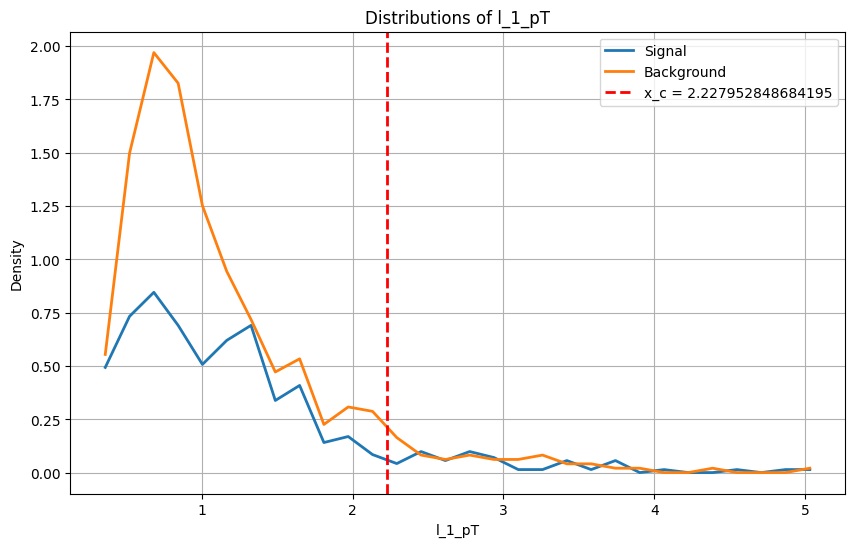

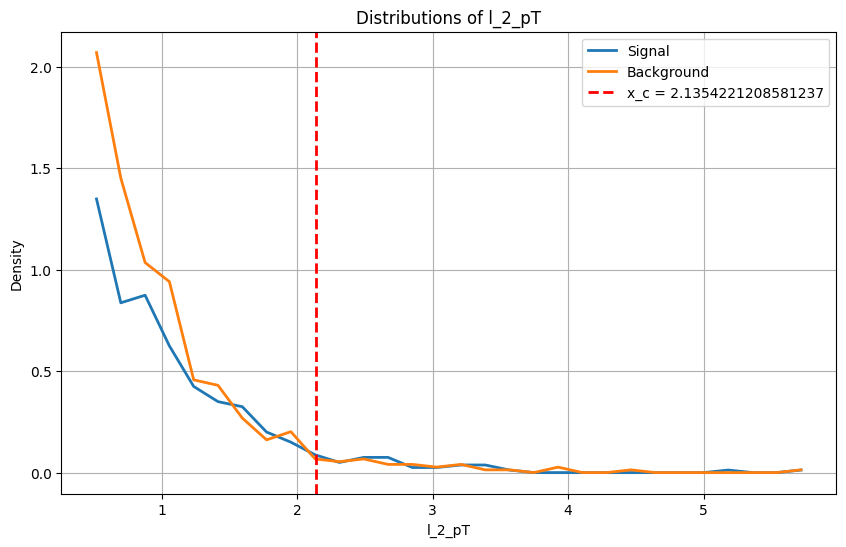

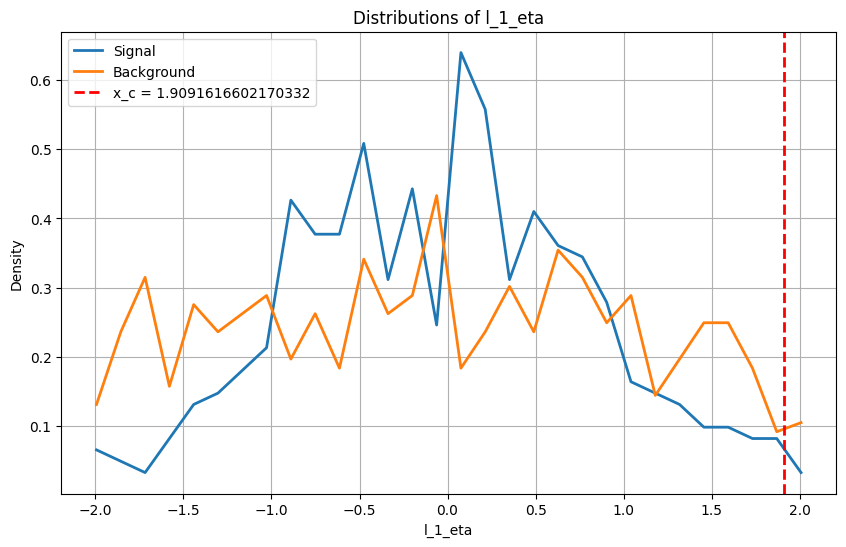

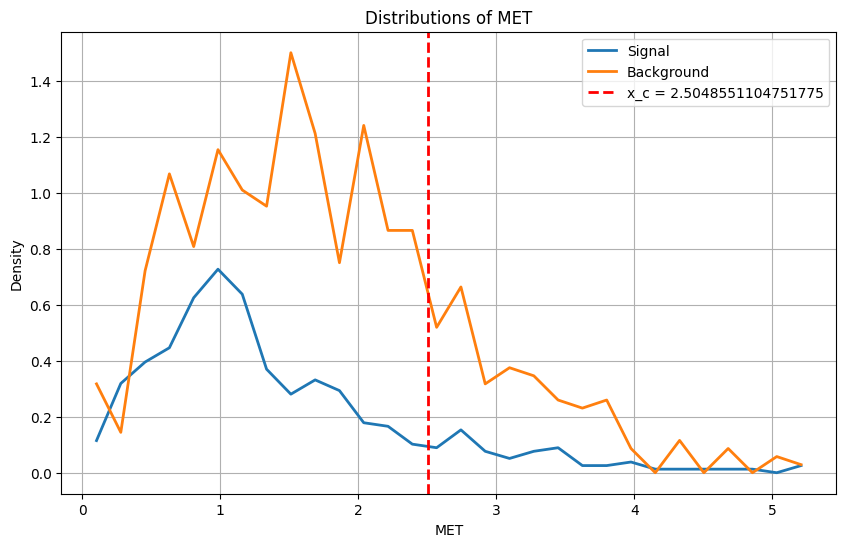

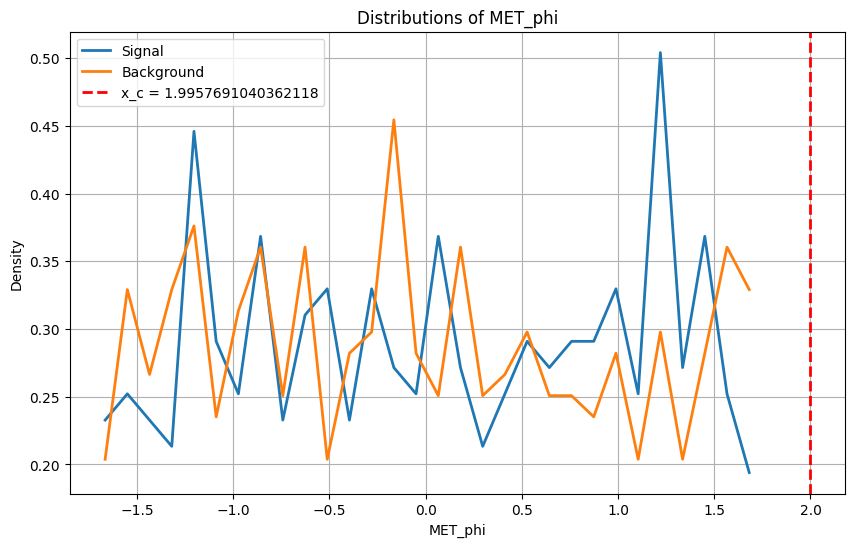

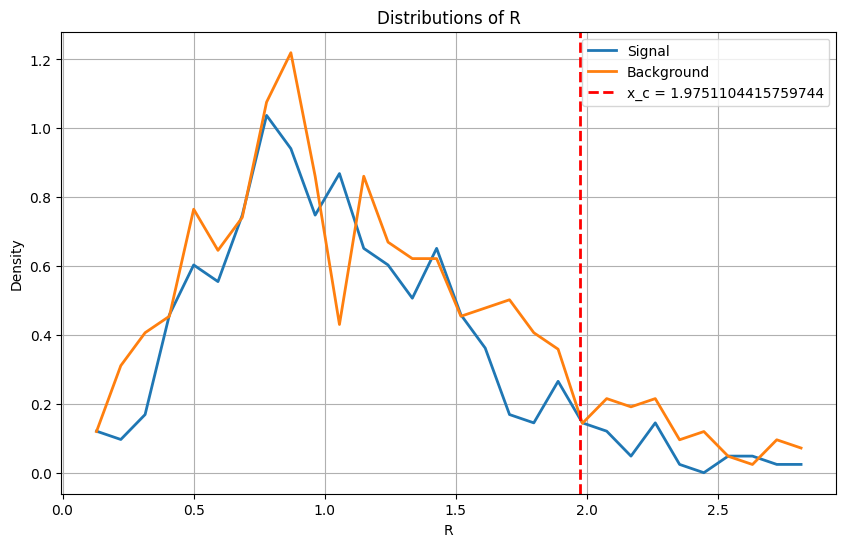

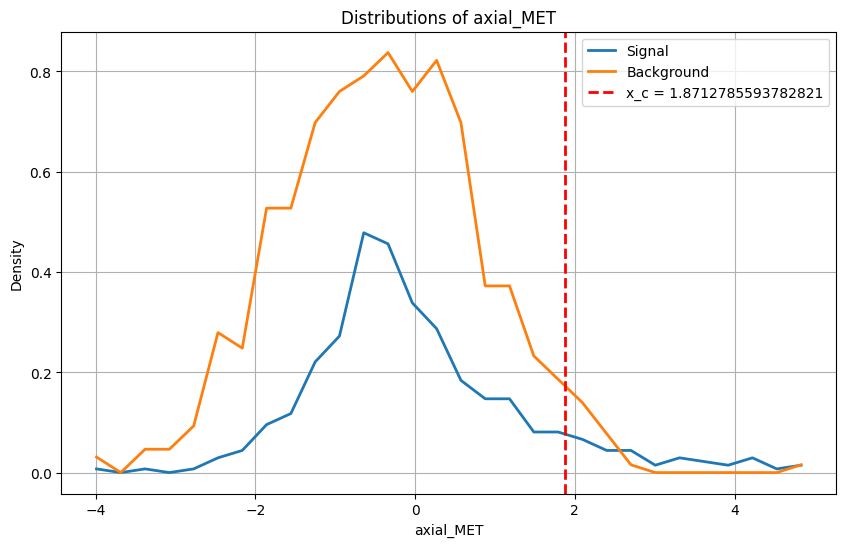

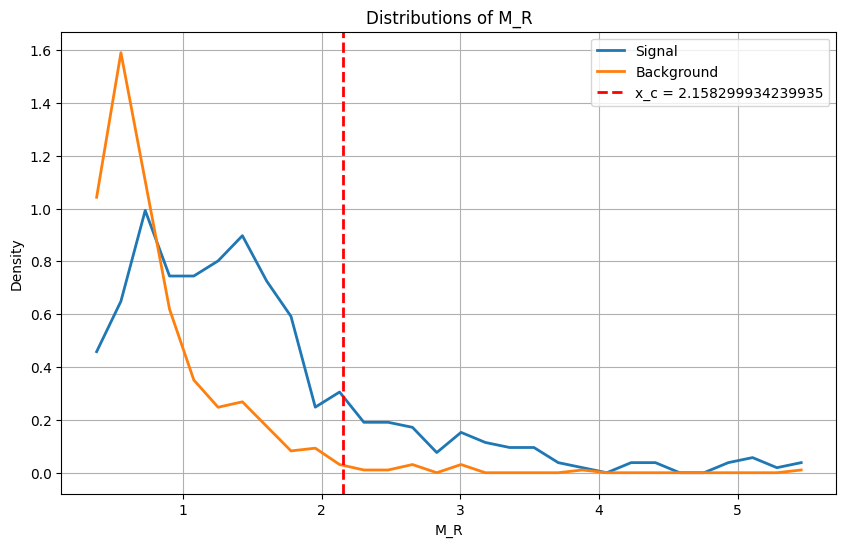

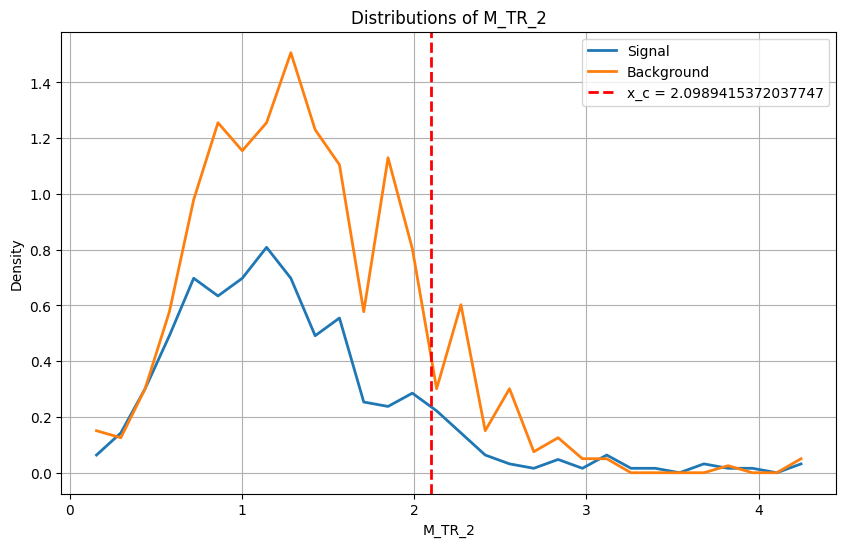

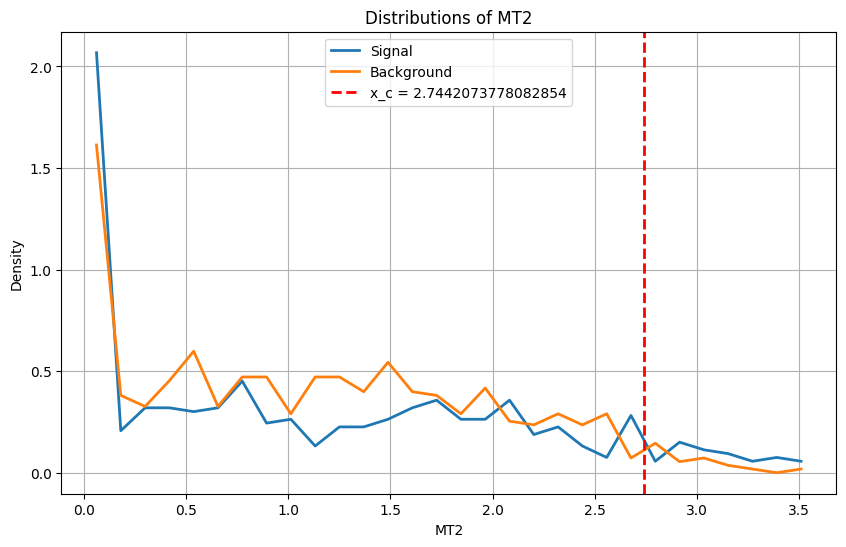

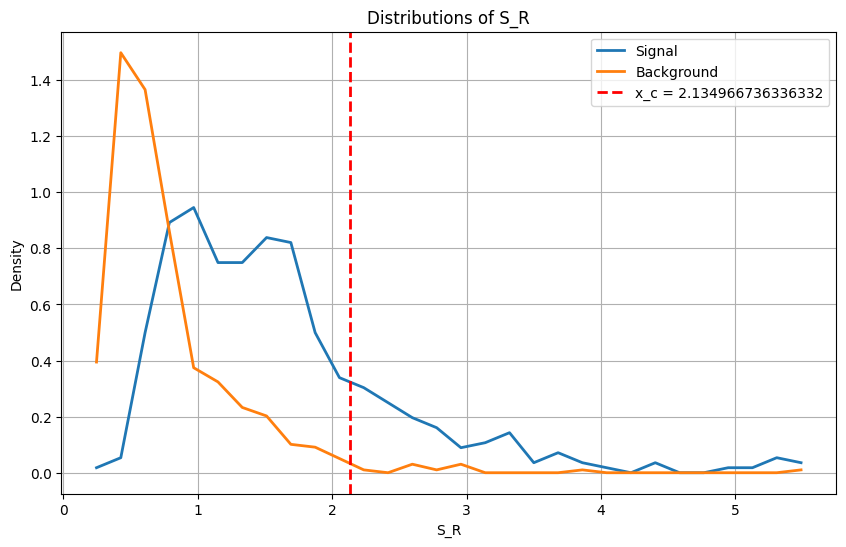

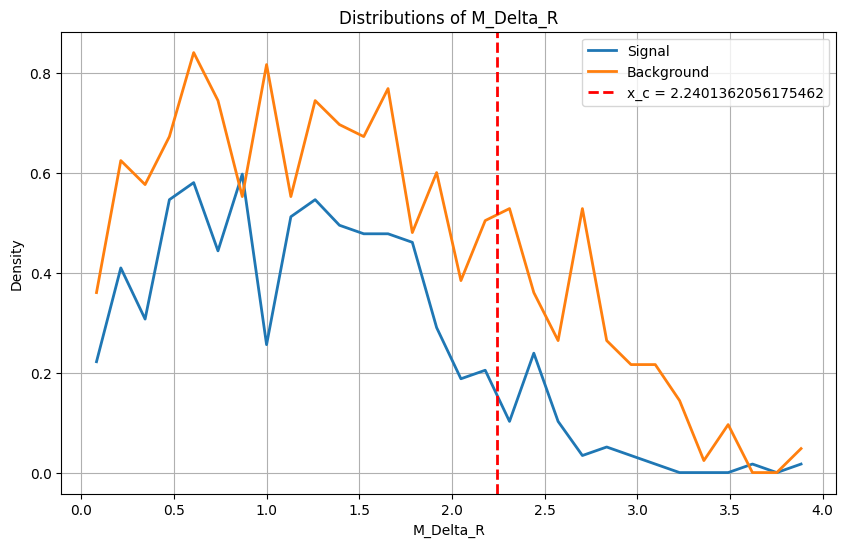

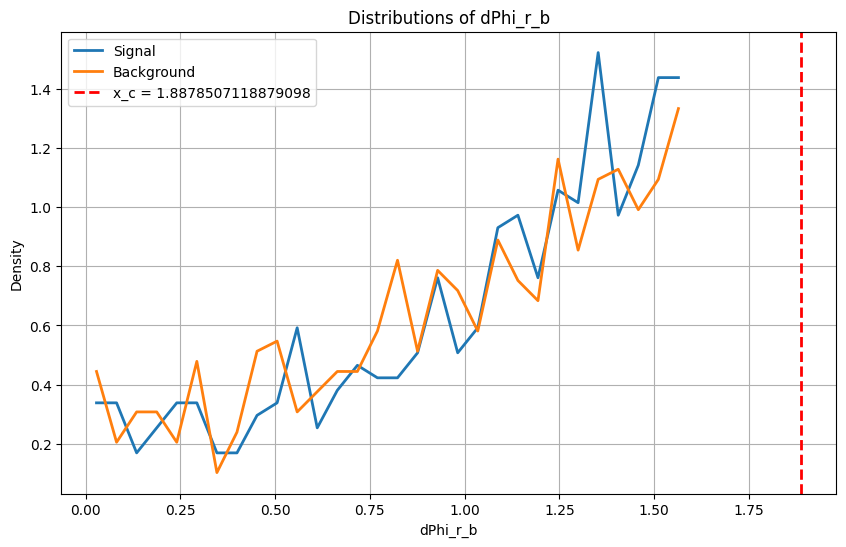

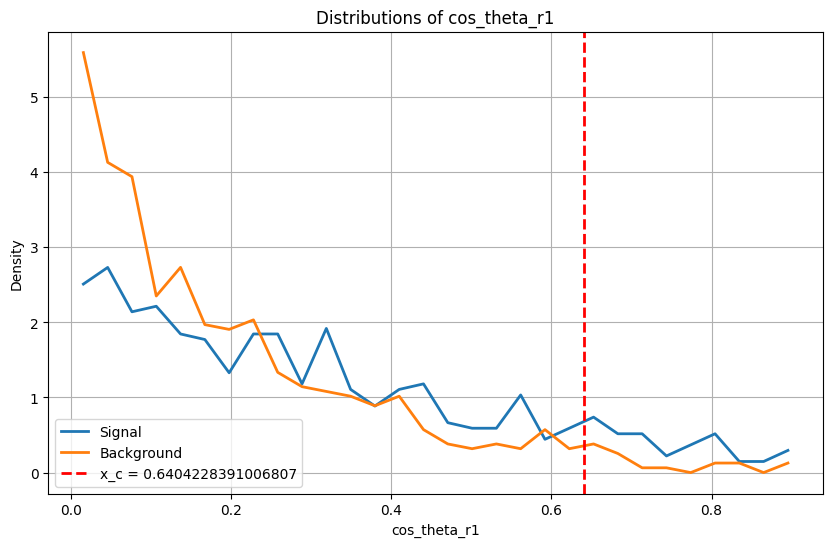

In [61]:
def plot_signal_background(df, observables, x_c_values):
    selections = {"Signal": df["signal"] == 1,"Background": df["signal"] == 0}

    for observable in observables:
        plt.figure(figsize=(10, 6))
        
        x_range = np.linspace(df[observable].min(), df[observable].max(), 1000)
        
        signal_density = np.histogram(df[selections["Signal"]][observable], bins=30, density=True)[0]
        background_density = np.histogram(df[selections["Background"]][observable], bins=30, density=True)[0]

        bin_edges = np.histogram(df[observable], bins=30)[1]

        signal_x = (bin_edges[:-1] + bin_edges[1:]) / 2
        background_x = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        plt.plot(signal_x, signal_density, label='Signal', linestyle='-', linewidth=2)
        plt.plot(background_x, background_density, label='Background', linestyle='-', linewidth=2)

        x_c = x_c_values.get(observable, None)
        if x_c is not None:
            plt.axvline(x=x_c, color='red', linestyle='--', label=f'x_c = {x_c}', linewidth=2)

        plt.title(f'Distributions of {observable}')
        plt.xlabel(observable)
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

def determine_optimal_selection_criteria(df, observables):
    x_c_values = {}
    for observable in observables:
        mu = df[observable].mean()
        sigma = df[observable].std()
        x_c = mu + 2 * sigma
        x_c_values[observable] = x_c
        
    return x_c_values

x_c_values = determine_optimal_selection_criteria(df, observables)
plot_signal_background(df, observables, x_c_values)

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\e_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\e_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

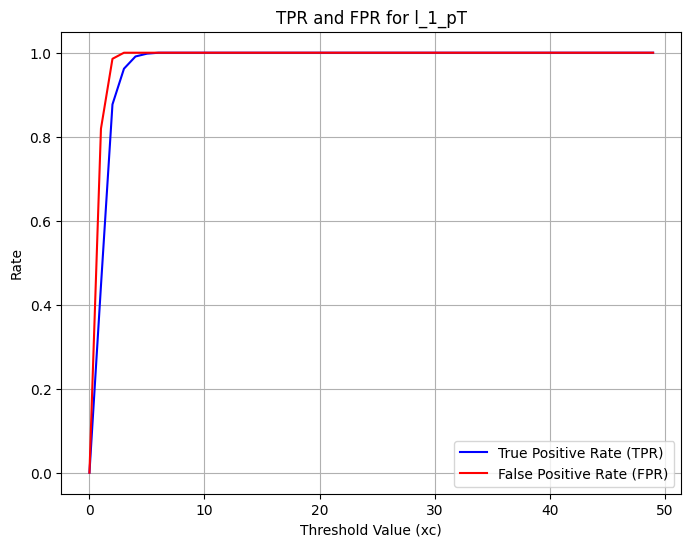

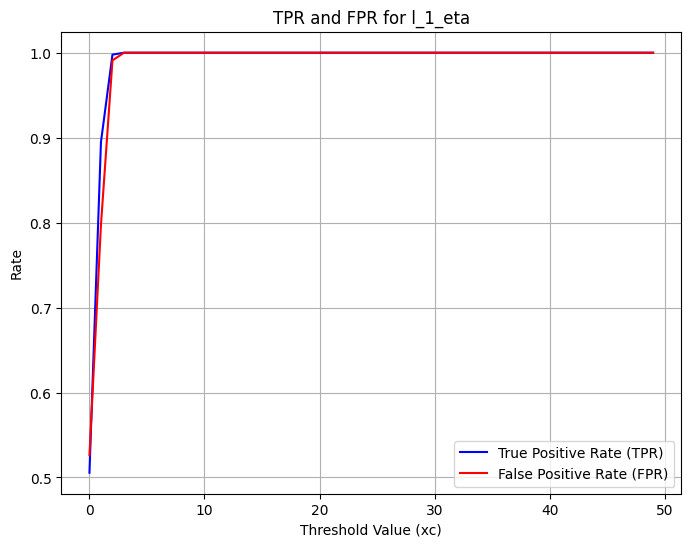

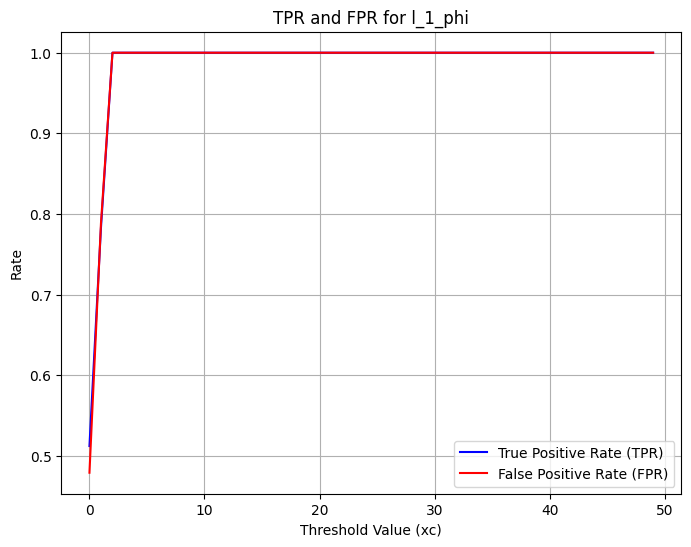

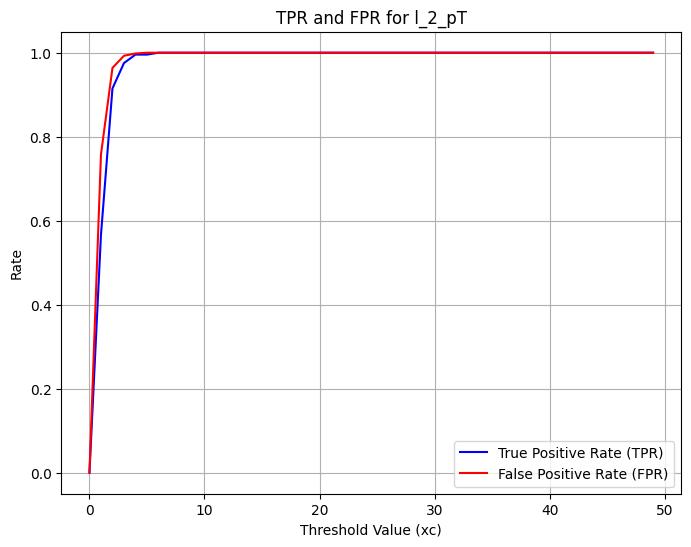

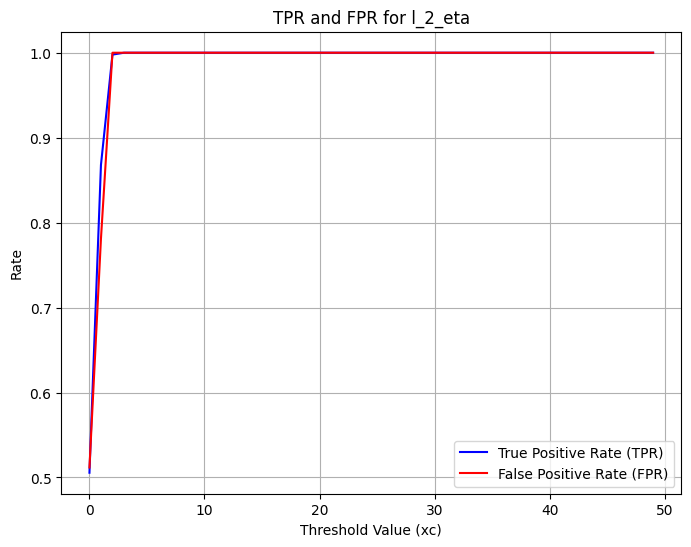

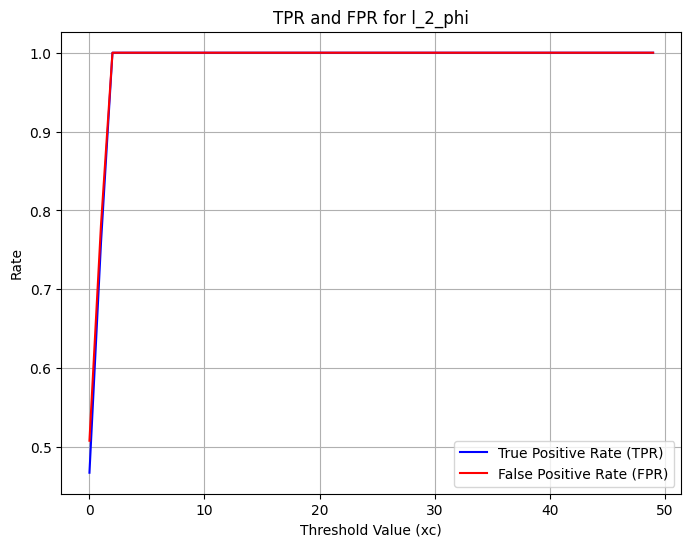

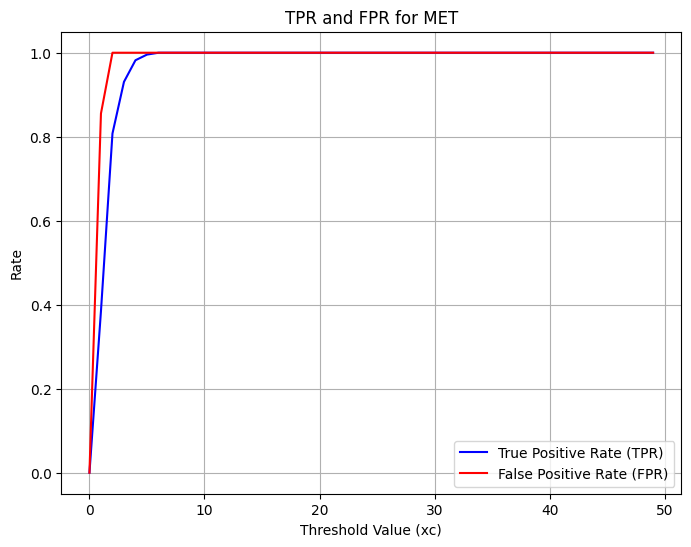

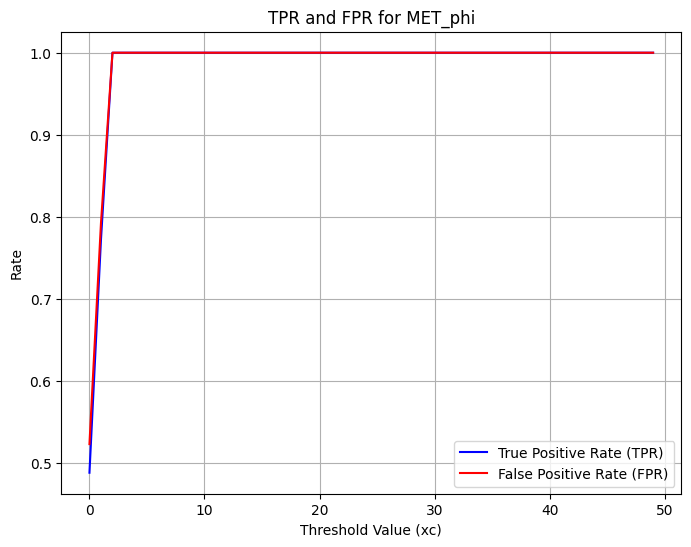

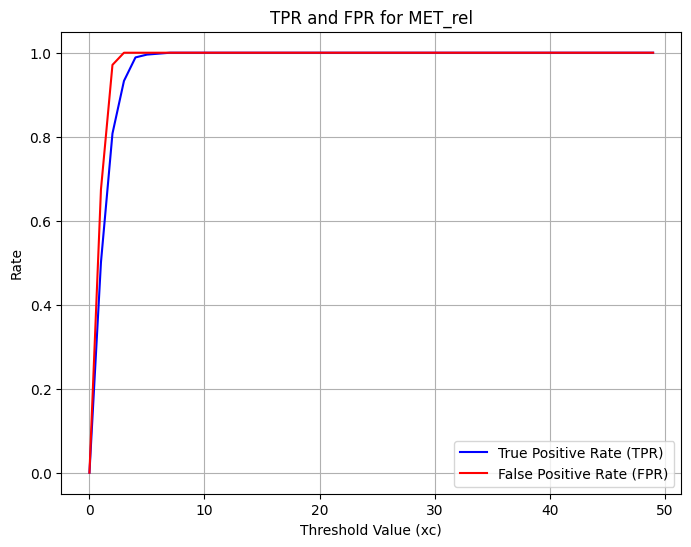

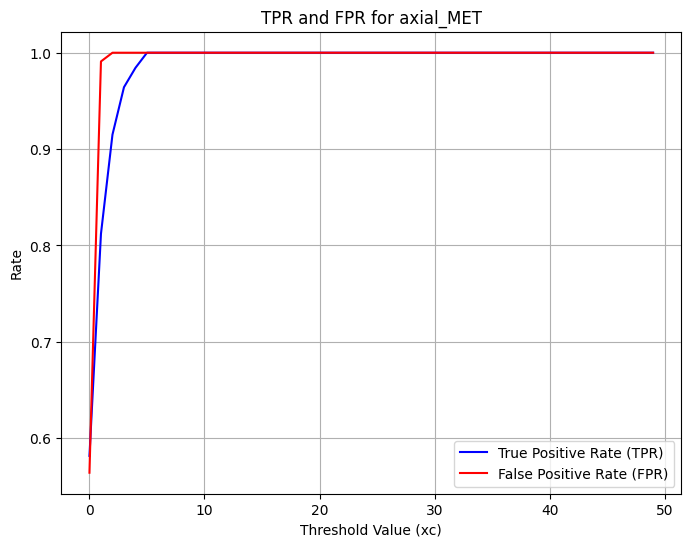

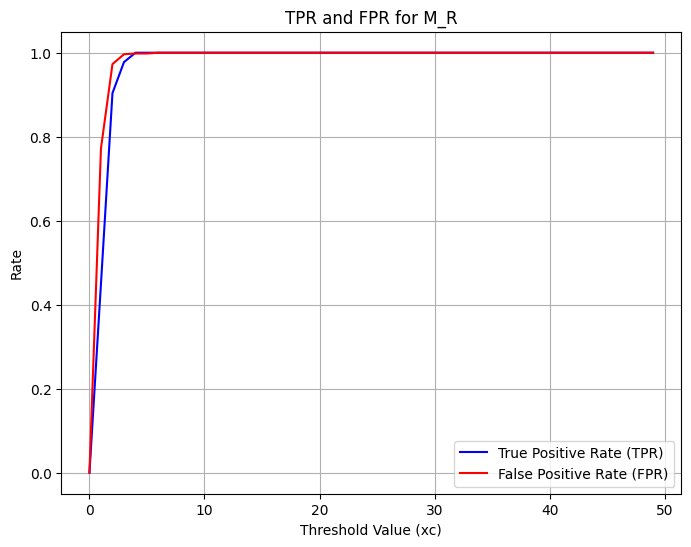

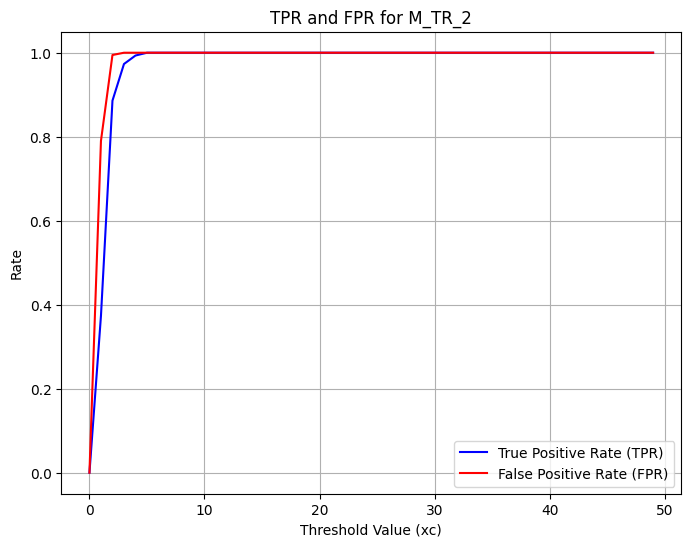

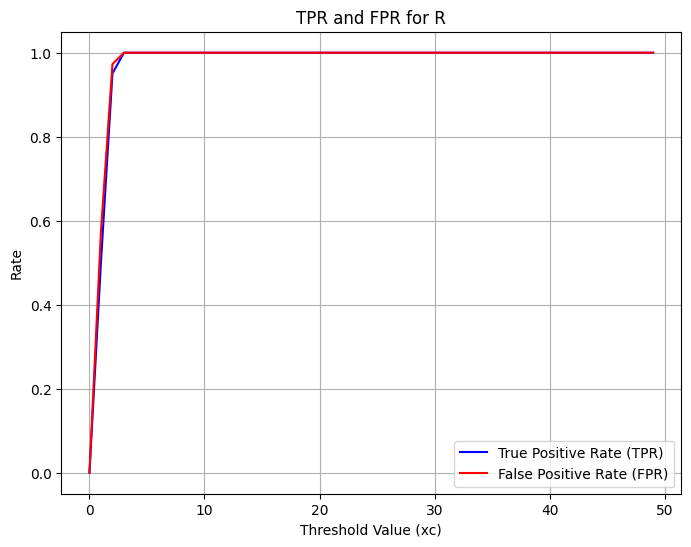

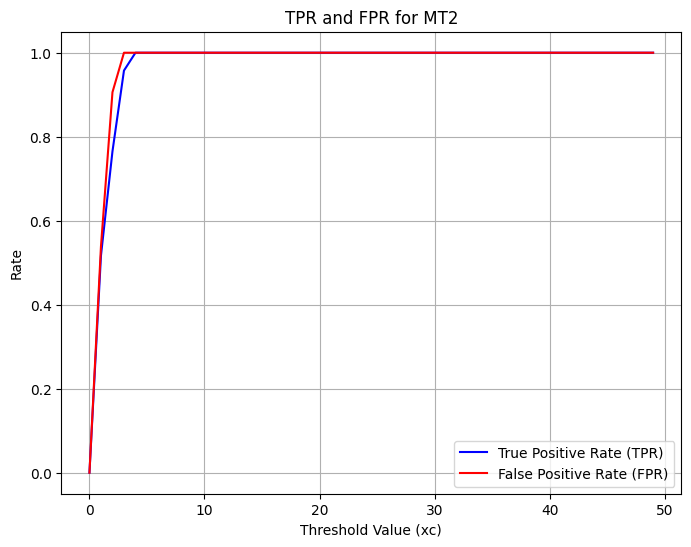

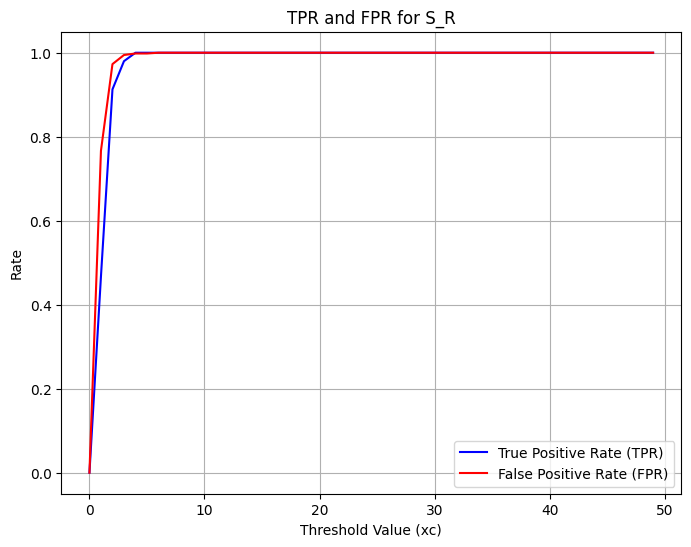

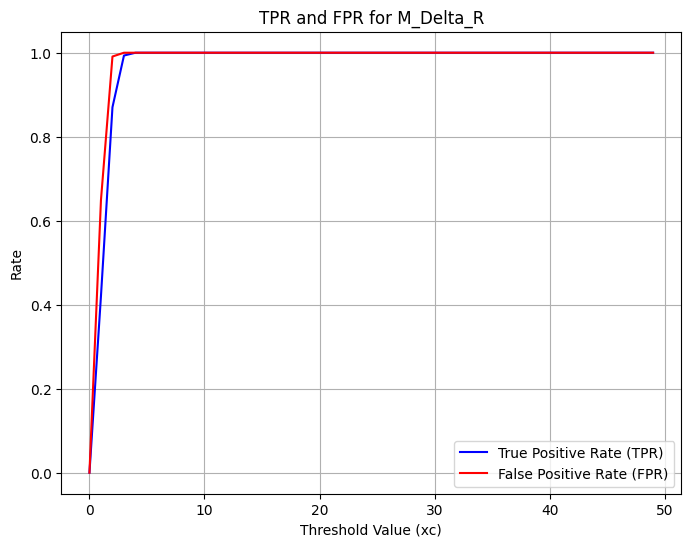

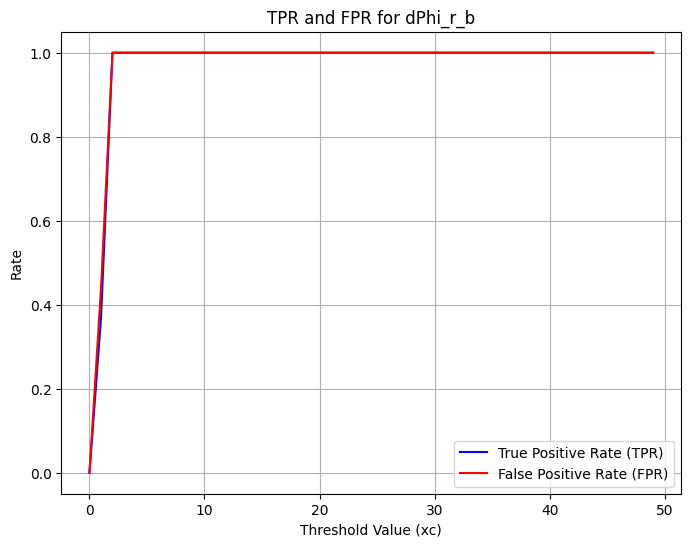

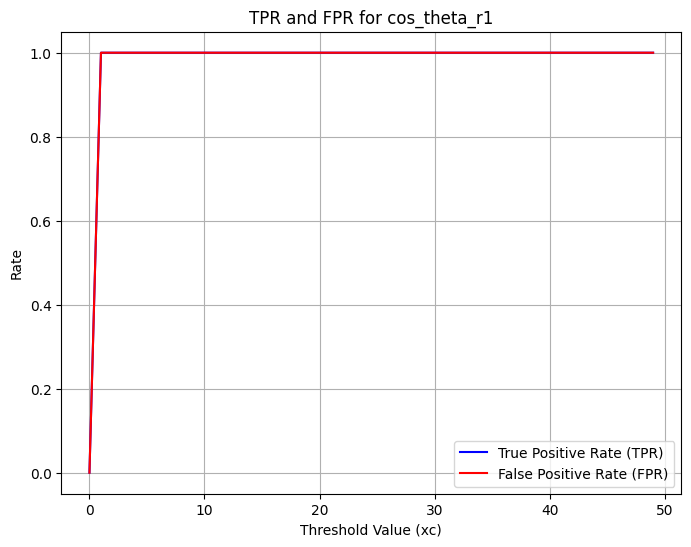

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def calc_tpr_and_fpr(df, column, xc_vals):
    tpr_values = []
    fpr_values = []

    for xc in xc_vals:
        true_pos = df[(df["signal"] == 1) & (df[column] < xc)].shape[0]
        false_pos = df[(df["signal"] == 0) & (df[column] < xc)].shape[0]
        true_neg = df[(df["signal"] == 0) & (df[column] >= xc)].shape[0]
        false_neg = df[(df["signal"] == 1) & (df[column] >= xc)].shape[0]

        tpr = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
        fpr = false_pos / (false_pos + true_neg) if (false_pos + true_neg) > 0 else 0

        tpr_values.append(tpr)
        fpr_values.append(fpr)

    return tpr_values, fpr_values

def plot_tpr_fpr(df, xc_vals):
    for column in df.columns[1:]:
        tpr_values, fpr_values = calc_tpr_and_fpr(df, column, xc_vals)

        plt.figure(figsize=(8, 6))
        plt.plot(xc_vals, tpr_values, label="True Positive Rate (TPR)", color="blue")
        plt.plot(xc_vals, fpr_values, label="False Positive Rate (FPR)", color="red")
        plt.xlabel("Threshold Value (xc)")
        plt.ylabel("Rate")
        plt.title(f"TPR and FPR for {column}")
        plt.legend()
        plt.grid(True)
        plt.show()

xc_vals = np.arange(0, 50, 1)

plot_tpr_fpr(df, xc_vals)

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

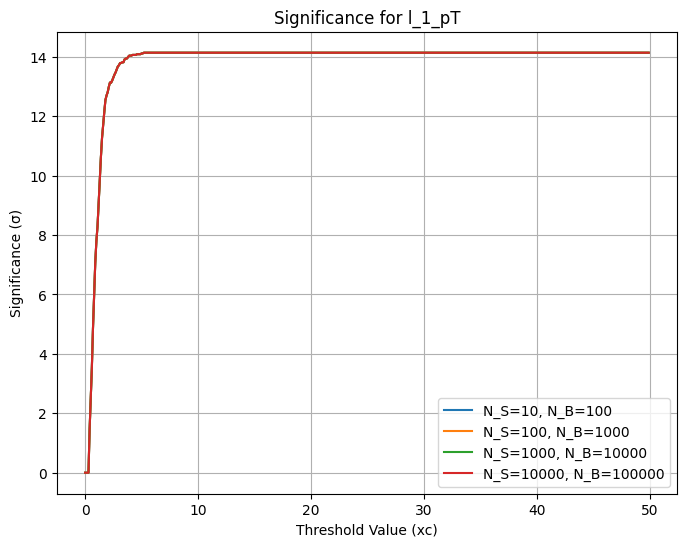

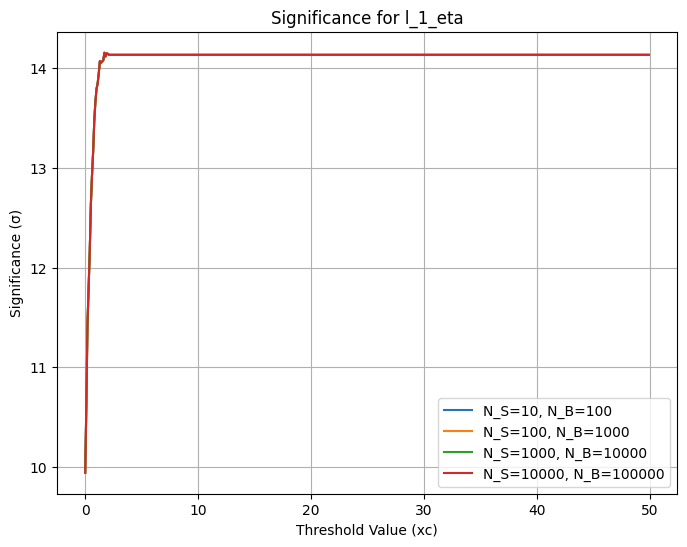

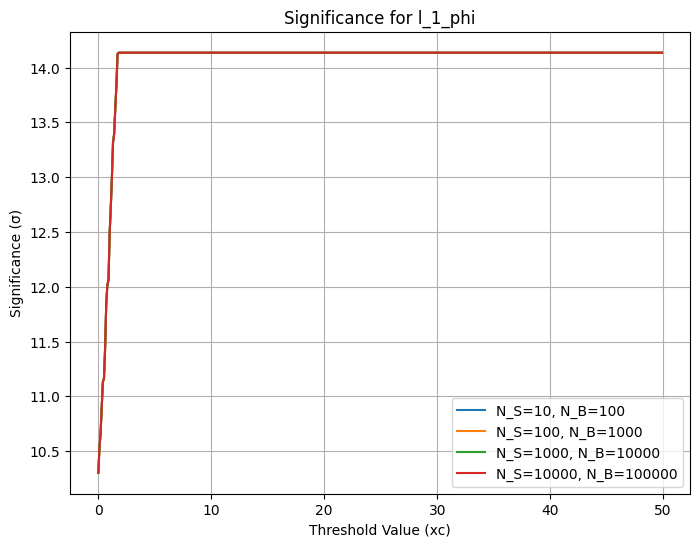

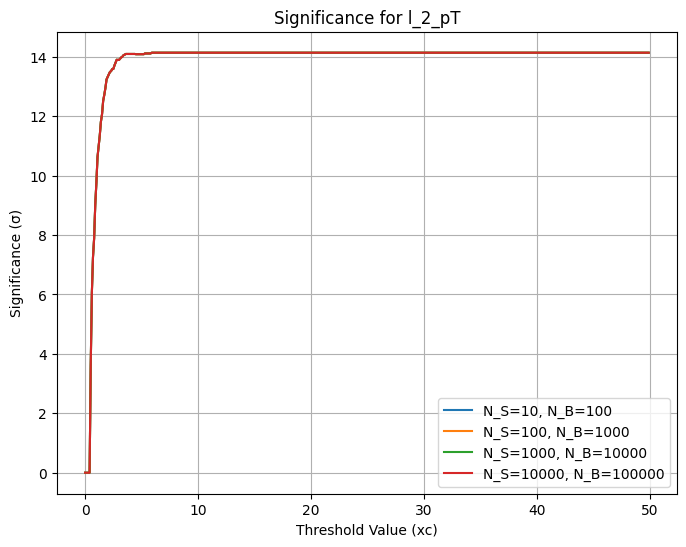

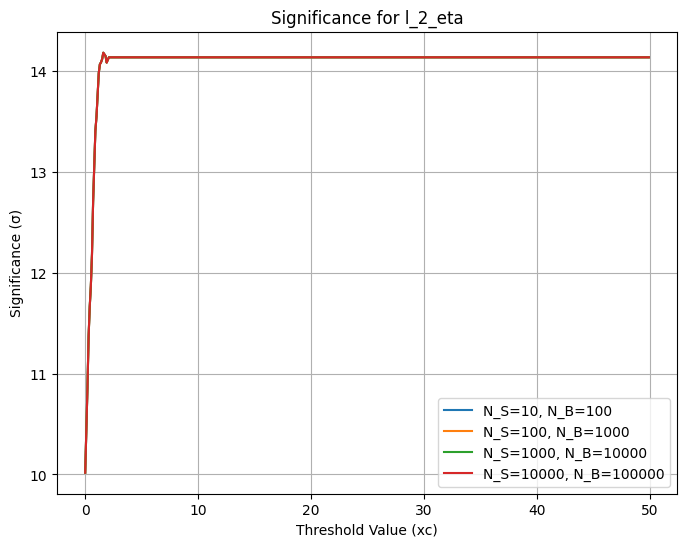

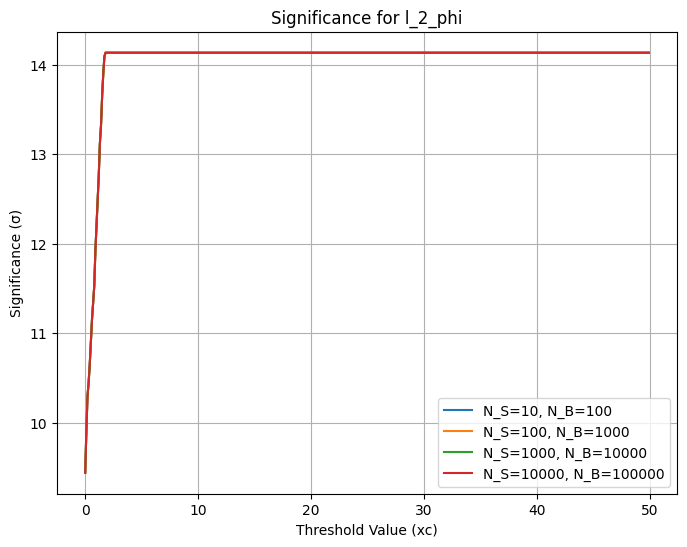

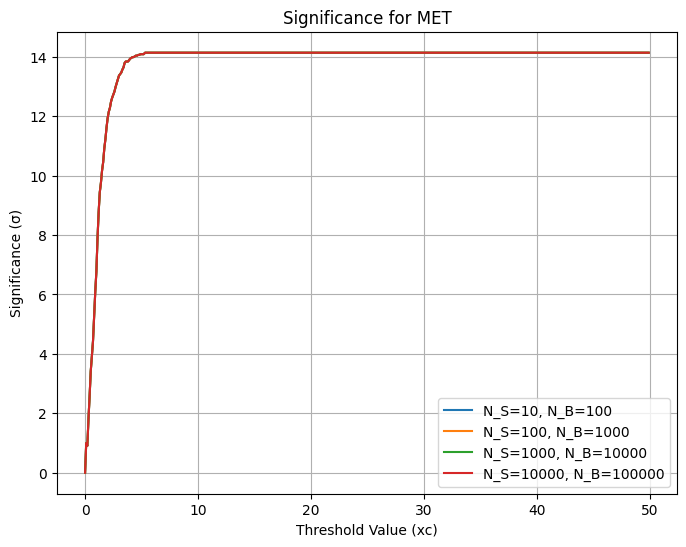

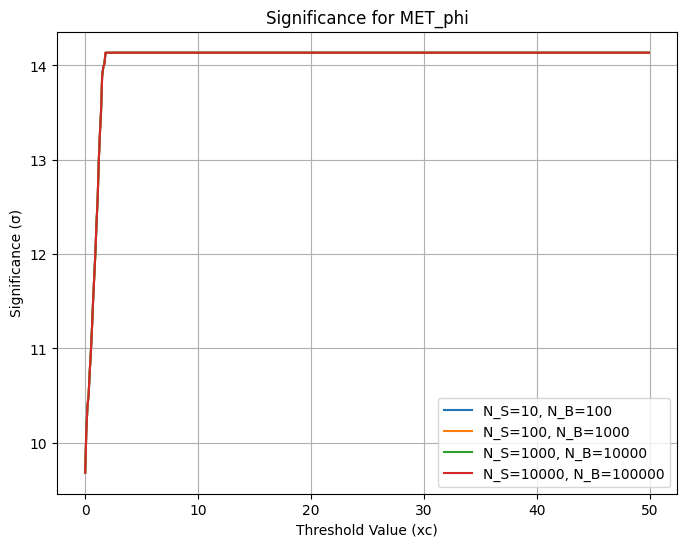

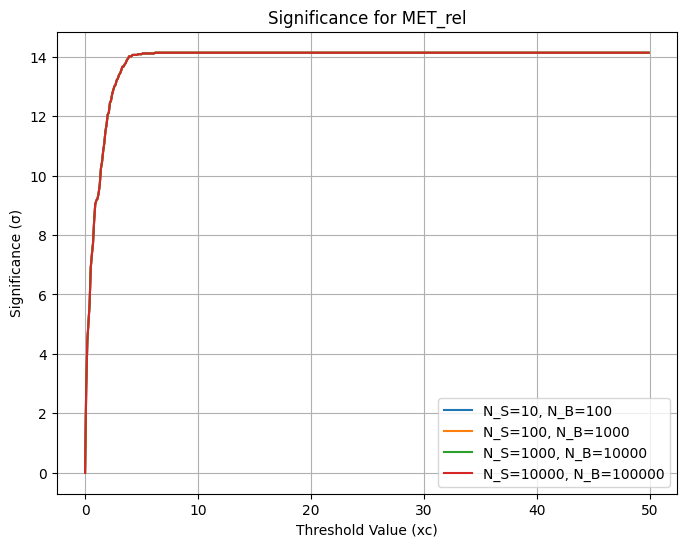

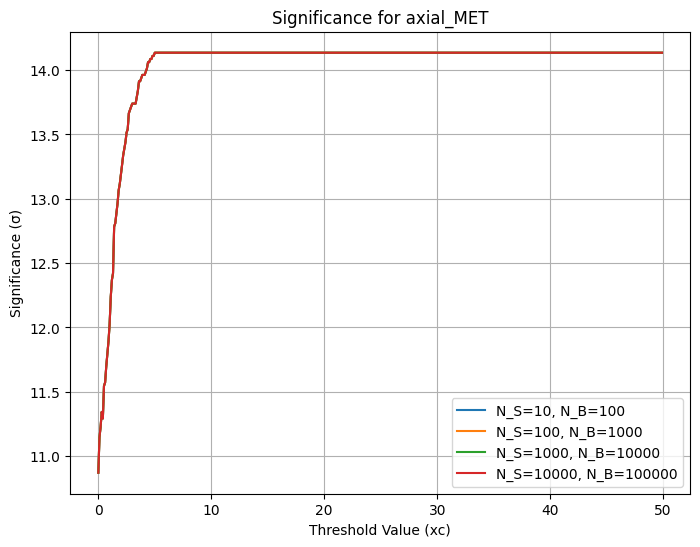

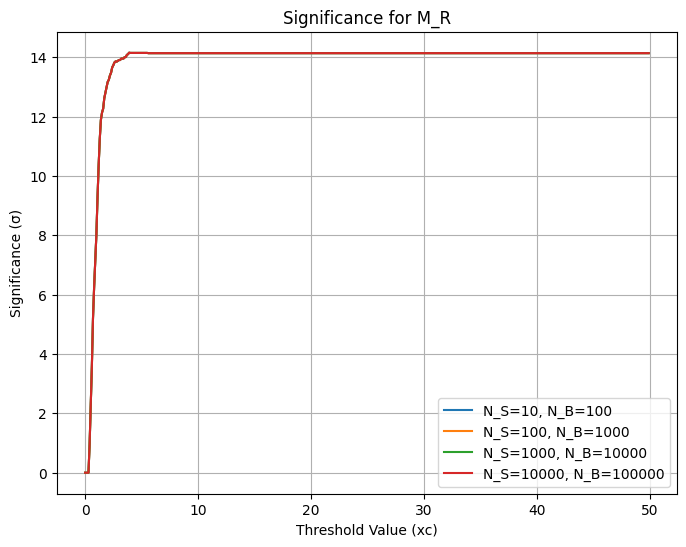

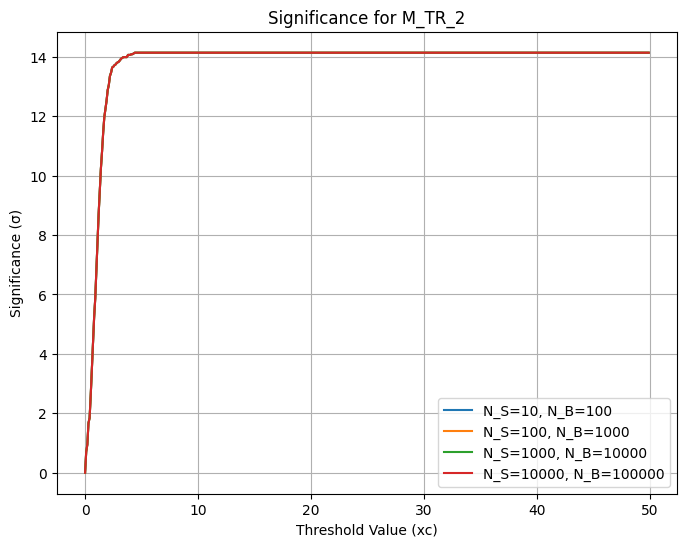

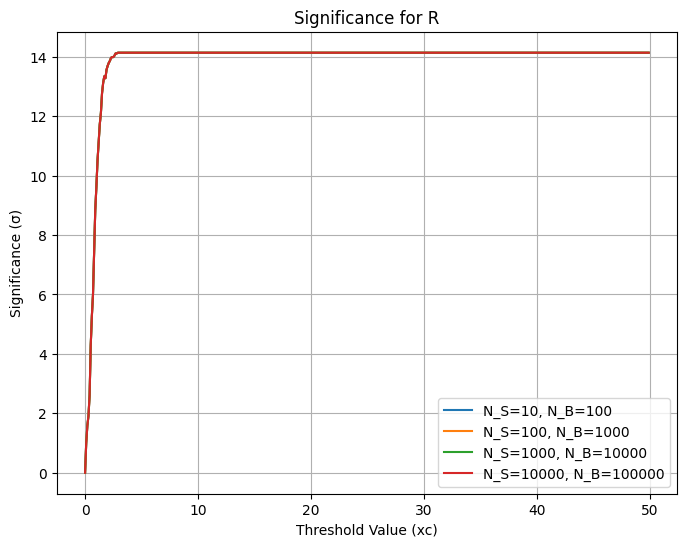

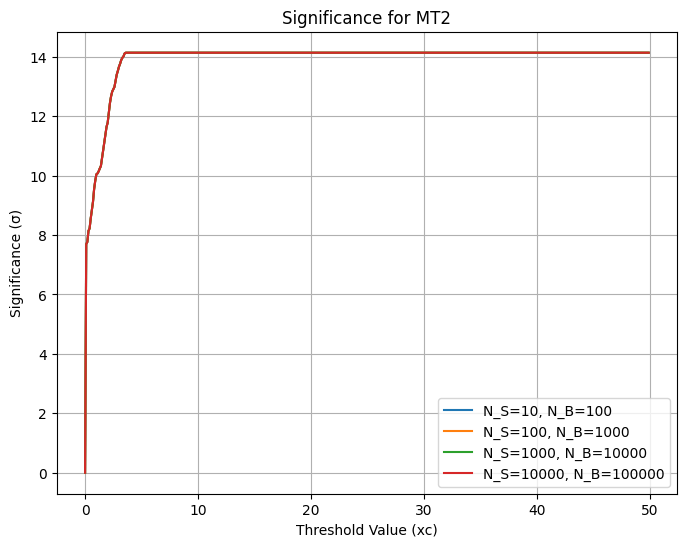

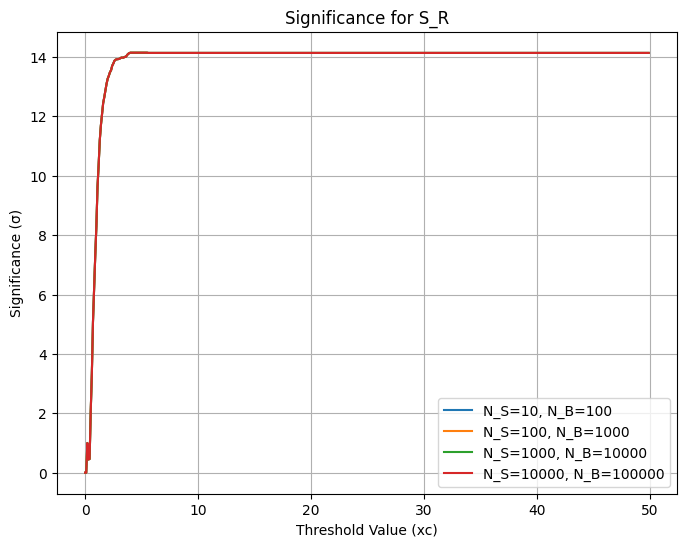

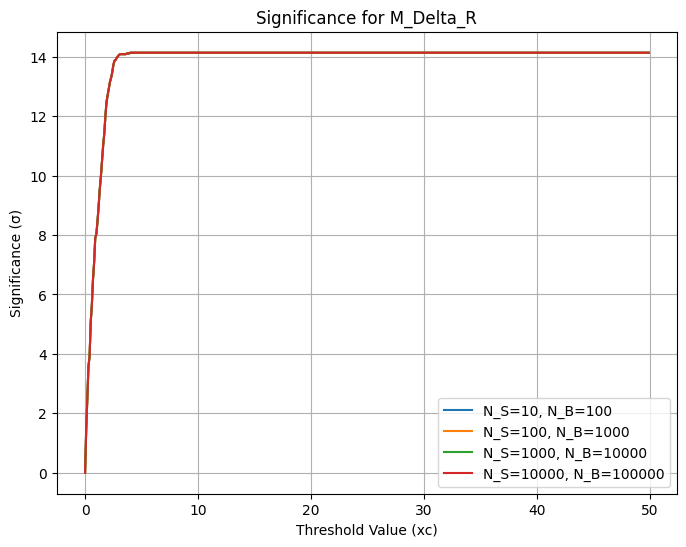

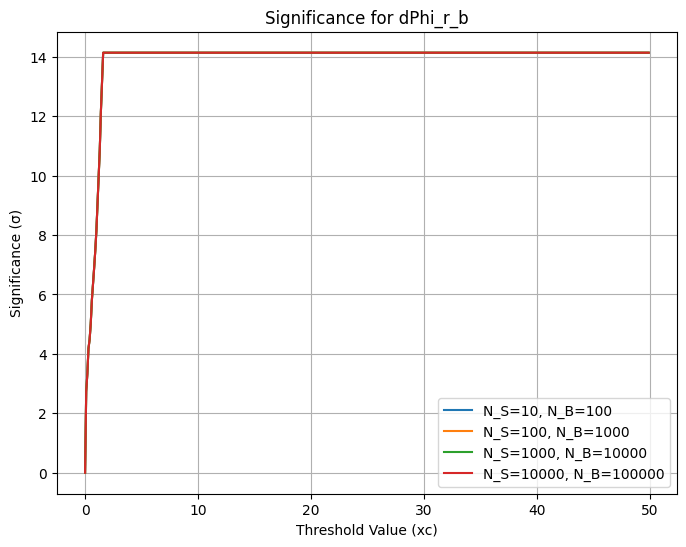

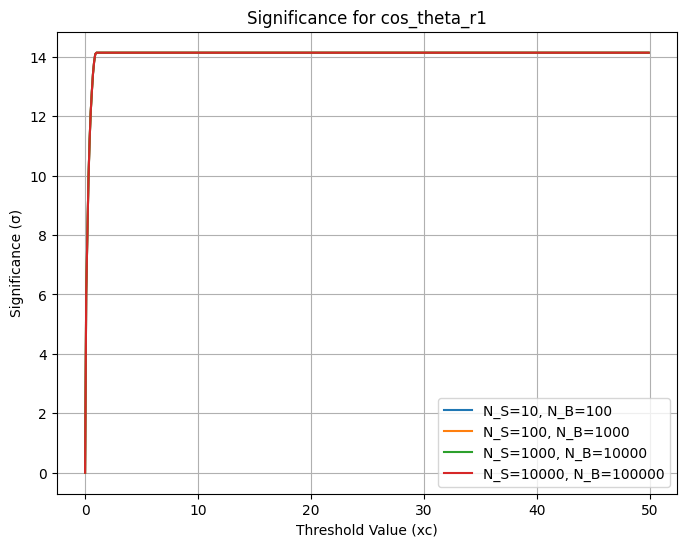

In [66]:
def calc_significance(df, column, xc_vals, N_S, N_B):
    significance_vals = []

    for xc in xc_vals:
        e_S = df[(df["signal"] == 1) & (df[column] < xc)].shape[0] / N_S
        e_B = df[(df["signal"] == 0) & (df[column] < xc)].shape[0] / N_B
        N_S_prime = e_S * N_S
        N_B_prime = e_B * N_B

        significance = (N_S_prime / np.sqrt(N_S_prime + N_B_prime)) if (N_S_prime + N_B_prime) > 0 else 0
        significance_vals.append(significance)

    return significance_vals

scenarios = [
    (10, 100), 
    (100, 1000), 
    (1000, 10000), 
    (10000, 100000)
    ]
xc_vals = np.arange(0, 50, 0.1)

for column in df.columns[1:]:
    plt.figure(figsize=(8, 6))
    for N_S, N_B in scenarios:
        significance_values = calc_significance(df, column, xc_vals, N_S, N_B)
        plt.plot(xc_vals, significance_values, label=f"N_S={N_S}, N_B={N_B}")
    
    plt.xlabel("Threshold Value (xc)")
    plt.ylabel("Significance (σ)")
    plt.title(f"Significance for {column}")
    plt.legend()
    plt.grid(True)
    plt.show()


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

In [67]:
# 1: 
# l_1_pT: 20
# MET: 25
# M_R: 15
# dPhi_r_b: 0.5

# 2: 
# l_1_pT: 30
# MET: 40
# M_R: 20
# dPhi_r_b: 0.8

# 3: 
# l_1_pT: 35
# MET: 50
# M_R: 25
# dPhi_r_b: 1.0

# 4: 
# l_1_pT: 40
# MET: 60
# M_R: 30
# dPhi_r_b: 1.5

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\e_S$, $\e_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

In [75]:
def create_cut_flow_table(df, scenarios):
    print("Cut-Flow Table")
    print(f"{'Scenario':<10} {'N_S':<10} {'N_B':<10} {'e_s':<10} {'e_b':<10} {'N_s':<10} {'N_b':<10} {'σ_s':<10}")
    
    for i, scenario in enumerate(scenarios):
        N_S = scenario["N_S"]
        N_B = scenario["N_B"]
        cuts = scenario["cuts"]

        selection = df.copy()
        for observable, threshold in cuts.items():
            selection = selection[selection[observable] < threshold]

        N_s = selection[selection["signal"] == 1].shape[0]
        N_b = selection[selection["signal"] == 0].shape[0]
        
        e_s = N_s / N_S if N_S > 0 else 0
        e_b = N_b / N_B if N_B > 0 else 0
        sigma_s = N_s / np.sqrt(N_s + N_b) if N_s + N_b > 0 else 0

        print(f"{i + 1:<10} {N_S:<10} {N_B:<10} {e_s:<10.2f} {e_b:<10.2f} {N_s:<10} {N_b:<10} {sigma_s:<10.2f}")


scenarios = [
    {"N_S": 10, "N_B": 100, "cuts": {"l_1_pT": 20, "MET": 25, "M_R": 15}},
    {"N_S": 100, "N_B": 1000, "cuts": {"l_1_pT": 30, "MET": 40, "M_R": 20}},
    {"N_S": 1000, "N_B": 10000, "cuts": {"l_1_pT": 35, "MET": 50, "M_R": 25}},
    {"N_S": 10000, "N_B": 100000, "cuts": {"l_1_pT": 40, "MET": 60, "M_R": 30}},
    ]

create_cut_flow_table(df, scenarios)

Cut-Flow Table
Scenario   N_S        N_B        e_s        e_b        N_s        N_b        σ_s       
1          10         100        44.70      5.53       447        553        14.14     
2          100        1000       4.47       0.55       447        553        14.14     
3          1000       10000      0.45       0.06       447        553        14.14     
4          10000      100000     0.04       0.01       447        553        14.14     


### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?

In [3]:
## For this analysis, I will use MET as the highest correlated observable and optimize on MT2.

def optimize_threshold(df, observable):
    return df[observable].median()

correlation_matrix = df.corr()
highest_correlated_obs = correlation_matrix["signal"].abs().sort_values(ascending=False).index[1]

threshold_obs1 = optimize_threshold(df, highest_correlated_obs)

selected_df = df[df[highest_correlated_obs] < threshold_obs1]

second_observable = "MT2"
threshold_obs2 = optimize_threshold(selected_df, second_observable)

selected_df = selected_df[selected_df[second_observable] < threshold_obs2]

threshold_obs1_after = optimize_threshold(selected_df, highest_correlated_obs)

print("Threshold for the first observable (", highest_correlated_obs, "):", threshold_obs1)
print("Threshold for the second observable (", second_observable, "):", threshold_obs2)

selected_df_reversed = df[df[second_observable] < threshold_obs2] 
threshold_obs1_reversed = optimize_threshold(selected_df_reversed, highest_correlated_obs)
selected_df_reversed = selected_df_reversed[selected_df_reversed[highest_correlated_obs] < threshold_obs1_reversed]

print("Threshold for the first observable after reversing selection (", highest_correlated_obs, "):", threshold_obs1_reversed)

print("Changing the order of selection can impact the results. Selecting first on a highly correlated observable may yield a different significance \nthan optimizing on the second observable first. This highlights the importance of the selection order in correlated datasets.")


NameError: name 'df' is not defined

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

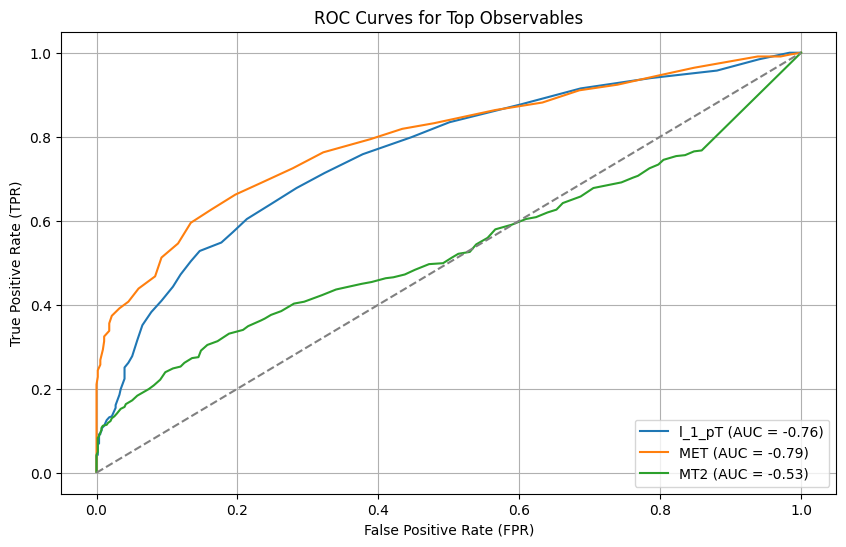

In [80]:
import numpy as np
import matplotlib.pyplot as plt

top_observables = ["l_1_pT", "MET", "MT2"]

plt.figure(figsize=(10, 6))

for observable in top_observables:
    y_true = df["signal"].values
    scores = df[observable].values

    sorted_indices = np.argsort(scores)
    y_true_sorted = y_true[sorted_indices]
    scores_sorted = scores[sorted_indices]

    tpr = []
    fpr = []
    thresholds = np.linspace(min(scores), max(scores), num=100)

    for threshold in thresholds:
        tp = np.sum((y_true_sorted == 1) & (scores_sorted >= threshold))
        fp = np.sum((y_true_sorted == 0) & (scores_sorted >= threshold))
        fn = np.sum((y_true_sorted == 1) & (scores_sorted < threshold))
        tn = np.sum((y_true_sorted == 0) & (scores_sorted < threshold))

        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)

    roc_auc = np.trapezoid(tpr, fpr)

    plt.plot(fpr, tpr, label=f"{observable} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Diagonal line for chance
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Top Observables")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

In [4]:
import matplotlib.pyplot as plt

def plot_signal_background_distributions(df, observables, conditions):
    for observable in observables:
        plt.figure(figsize=(10, 5))

        for condition in conditions:
            signal_data = df.query(f"signal == 1 and {condition['name']}")
            background_data = df.query(f"signal == 0 and {condition['name']}")
            
            if len(signal_data[observable]) > 0:
                plt.hist(signal_data[observable], bins=50, histtype="step", 
                         label=f"Signal ({condition['name']})", density=True)
            
            if len(background_data[observable]) > 0:
                plt.hist(background_data[observable], bins=50, histtype="step", 
                         label=f"Background ({condition['name']})", density=True)

        plt.xlabel(observable)
        plt.ylabel("Normalized Counts")
        plt.title(f"Signal and Background Distributions for {observable}")
        plt.legend()
        plt.grid(True)
        plt.show()

observables = ["MET", "MT2", "R"]
conditions = [
    {"name": "MT2 > 100"},
    {"name": "M_TR_2 < 50"},
    {"name": "R > 0.5"}
    ]

plot_signal_background_distributions(df, observables, conditions)

NameError: name 'df' is not defined

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

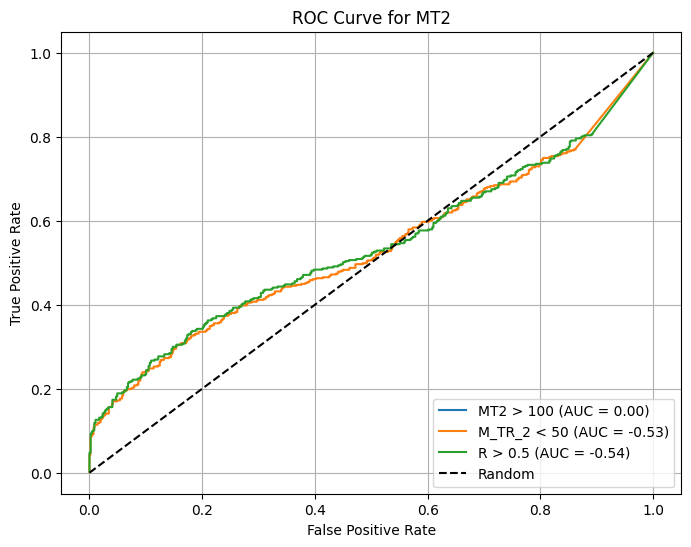

In [90]:
import matplotlib.pyplot as plt

def compute_roc(df, observable, condition):
    selected_df = df.query(condition)
    
    signal_count = selected_df[selected_df["signal"] == 1].shape[0]
    background_count = selected_df[selected_df["signal"] == 0].shape[0]
    
    signal_values = selected_df[selected_df["signal"] == 1][observable]
    background_values = selected_df[selected_df["signal"] == 0][observable]
    
    thresholds = sorted(set(signal_values) | set(background_values))
    
    tpr_list = []
    fpr_list = []

    for threshold in thresholds:
        tp = (signal_values >= threshold).sum()
        fp = (background_values >= threshold).sum()
        tn = (background_values < threshold).sum()
        fn = (signal_values < threshold).sum()
        
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return tpr_list, fpr_list

def plot_roc_curve(df, observables, conditions):
    for observable in observables:
        plt.figure(figsize=(8, 6))

        for condition in conditions:
            tpr, fpr = compute_roc(df, observable, condition["name"])
            roc_auc = sum([(fpr[i+1] - fpr[i]) * (tpr[i+1] + tpr[i]) / 2 for i in range(len(fpr) - 1)])

            plt.plot(fpr, tpr, label=f"{condition['name']} (AUC = {roc_auc:.2f})")
        
        plt.plot([0, 1], [0, 1], "k--", label="Random")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {observable}")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

plot_roc_curve(df, observables=["MT2"], conditions=[
    {"name": "MT2 > 100"},
    {"name": "M_TR_2 < 50"},
    {"name": "R > 0.5"}
    ])


### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.

ROC Curve for the selection order: MT2 > 100 followed by M_TR_2 < 50


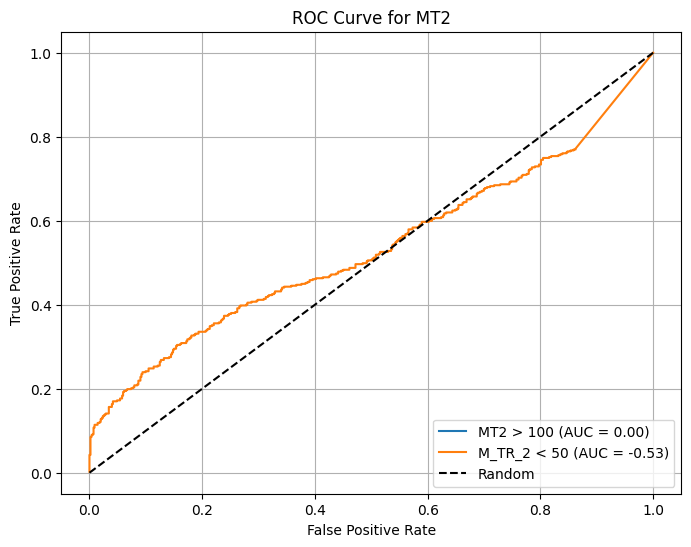

ROC Curve for the selection order: M_TR_2 < 50 followed by MT2 > 100


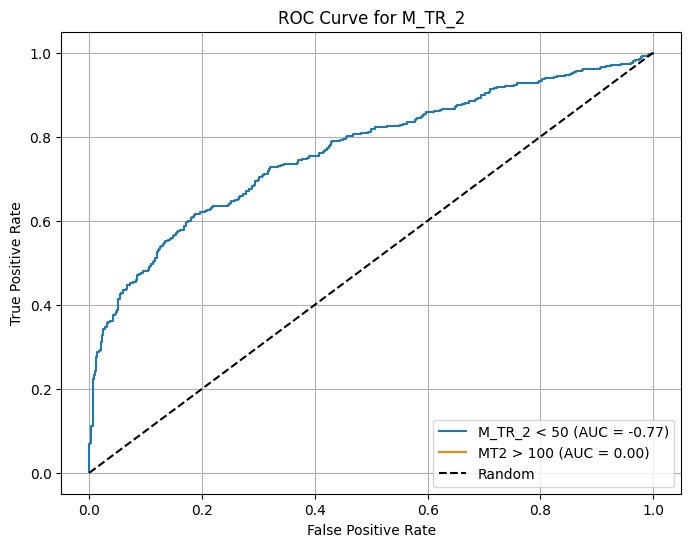

In [93]:
conditions_first = [
    {"name": "MT2 > 100"},
    {"name": "M_TR_2 < 50"}
    ]

conditions_second = [
    {"name": "M_TR_2 < 50"},
    {"name": "MT2 > 100"}
    ]

print("ROC Curve for the selection order: MT2 > 100 followed by M_TR_2 < 50")
plot_roc_curve(df, observables=["MT2"], conditions=conditions_first)

print("ROC Curve for the selection order: M_TR_2 < 50 followed by MT2 > 100")
plot_roc_curve(df, observables=["M_TR_2"], conditions=conditions_second)


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

In [107]:
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

delta = m_s-m_b

delta=np.matrix(m_s-m_b).transpose()

S_B= delta*delta.transpose()

df_sig_0-m_s

delta_s=np.matrix(df_sig_0-m_s).transpose()

S_W_s= delta_s*delta_s.transpose()

delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()

S_W=S_W_s+S_W_b

S_W_inv = np.linalg.inv(S_W)

print("Between-Class Covariance Matrix (S_B):")
print(S_B)

print("\nWithin-Class Covariance Matrix (S_W):")
print(S_W)

print("\nInverse Within-Class Covariance Matrix (S_W_inv):")
print(S_W_inv)

Between-Class Covariance Matrix (S_B):
[[ 2.70622298e-01  8.03734277e-03 -2.44015068e-02  1.25721145e-01
   2.95452807e-02  3.30323476e-02  3.92413291e-01  2.73673351e-02
   2.41088754e-01  3.99778317e-02  1.79791766e-01  2.63608967e-01
   5.17529138e-02  9.70516562e-02  1.71472991e-01  1.95027632e-01
   2.50105846e-02  5.70534550e-02]
 [ 8.03734277e-03  2.38704938e-04 -7.24712174e-04  3.73385319e-03
   8.77479609e-04  9.81043698e-04  1.16544725e-02  8.12795745e-04
   7.16021173e-03  1.18732099e-03  5.33972279e-03  7.82905045e-03
   1.53703487e-03  2.88238417e-03  5.09265944e-03  5.79222015e-03
   7.42801472e-04  1.69445821e-03]
 [-2.44015068e-02 -7.24712174e-04  2.20023825e-03 -1.13360406e-02
  -2.66404273e-03 -2.97846504e-03 -3.53831730e-02 -2.46766145e-03
  -2.17385223e-02 -3.60472635e-03 -1.62114875e-02 -2.37691278e-02
  -4.66646350e-03 -8.75096643e-03 -1.54613990e-02 -1.75852770e-02
  -2.25515766e-03 -5.14440339e-03]
 [ 1.25721145e-01  3.73385319e-03 -1.13360406e-02  5.84054096e-0

### Exercise 8.2

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

In [112]:
w = S_W_inv * np.matrix(m_b - m_s).transpose()
w_1 = w / sum(w)

print(w_1)

[[ 0.36960078]
 [ 0.00189312]
 [ 0.00152134]
 [ 0.13152121]
 [ 0.00162227]
 [ 0.0313313 ]
 [ 0.45375342]
 [ 0.00512678]
 [-0.08847093]
 [-0.00904644]
 [-0.25628181]
 [-0.01468634]
 [-0.32968047]
 [-0.05809054]
 [-0.04493945]
 [ 0.2830855 ]
 [ 0.01901691]
 [ 0.50272335]]


### Exercise 8.3

Draw the ROC curve for $F_n$. 

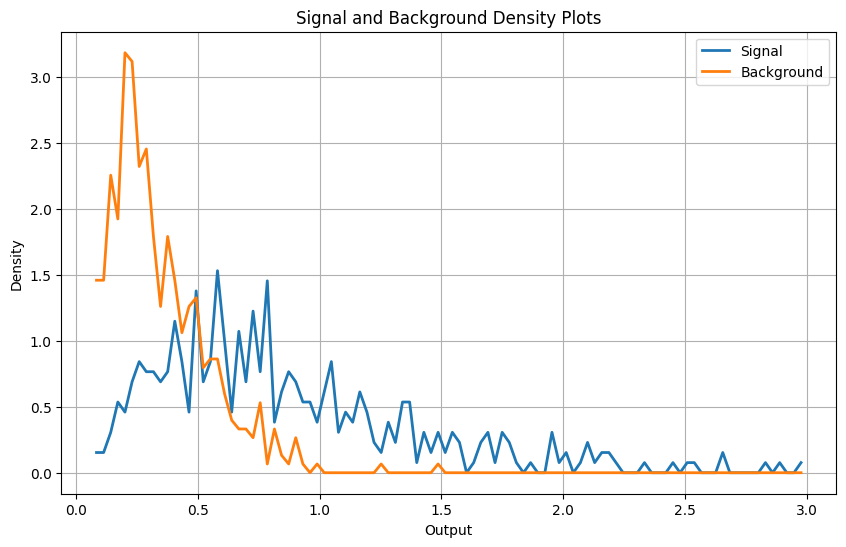

In [116]:
output_s = np.matrix(df_sig_0) * w_1
output_b = np.matrix(df_bkg_0) * w_1

h_s, bins_s = np.histogram(output_s, bins=100, density=True)
h_b, bins_b = np.histogram(output_b, bins=bins_s, density=True)

bin_centers_s = 0.5 * (bins_s[1:] + bins_s[:-1])
bin_centers_b = 0.5 * (bins_b[1:] + bins_b[:-1])

plt.figure(figsize=(10, 6))
plt.plot(bin_centers_s, h_s, label="Signal", linewidth=2)
plt.plot(bin_centers_b, h_b, label="Background", linewidth=2)

plt.xlabel("Output")
plt.ylabel("Density")
plt.title("Signal and Background Density Plots")
plt.legend()
plt.grid(True)
plt.show()


### Exercise 8.4

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [48]:
# I think the answer to this question was said in one of the lectures (the maximum significance for 
# this is the black line representing the name "4", and going off of the range 10,000 to 100,000 meaning 
# that the highest significance woule be about 40) that being said, looking at my graphs it looks like my 
# highest significance was 14.